# Problem statement : 

effectively predicting the churning of customer so we can prevent the churning out .


# Business understanding :
* customer churn is one of the major problems in UPI service since the customer aquisation cost is higher than than the customer retention cost .
* so predicting the churning of customers and preventing the churn can have a major impact on the business 
* according to our problem statement predicting a churning out customer as a not churning customer i.e, false negative can become caustlier to the business .
* so the model should have a high positive recall score to achive this.

### importing all the necessary libraries .

In [276]:
# for data manipulation 
import pandas as pd
import numpy as np

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[8,6]
plt.style.use("seaborn-bright")

#for Stats
import scipy
from scipy.stats import shapiro
from statsmodels.stats import weightstats as stests
from scipy.stats import stats
from scipy.stats import tests
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from statsmodels.api import Logit

# import libraries for data preprocessinhg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler,PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer


# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# librarie for metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

# libraries for optimization and interpretation
import shap

# for warnings
import warnings
warnings.filterwarnings("ignore")
print("All libraries are imported")

All libraries are imported


In [2]:
df=pd.read_csv('capestone_data (1)')

In [3]:
df.head()

,Unnamed: 0,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
0,0,samsung,0,20.0,Ahmedabad,2.0,1.0,0.0,1.0,0.0,NaN,0.0,False,3.0,0.0,1,0,269438,0
1,1,xiaomi,0,20.0,Surat,1.0,1.0,0.0,1.0,0.0,NaN,0.0,True,0.0,0.0,1,0,139521,0
2,2,xiaomi,0,20.0,Kullu,1.0,2.0,1.0,1.0,0.0,0.0,0.0,True,0.0,0.0,0,1,307352,0
3,3,oneplus,0,20.0,Mumbai,2.0,4.0,1.0,2.0,322.0,2.0,20.0,False,0.0,0.0,1,1,456424,0
4,4,apple,0,20.0,Pune,2.0,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,1.0,1,1,398779,0


## Datset description

* column name                               meaning

* device                                  - user's device brand
* first_payment_amount                    - user's first payment amount
* age	                                    - user's age
* city                                    - user's city
* number_of_cards                         - number of cards user owns
* payments_initiated                      - number of payments initiated by user
* payments_failed                         - number of payments failed
* payments_completed                      - number of payments completed
* payments_completed_amount_first_7days   - amt of payment completed in first 7 days of joining
* reward_purchase_count_first_7days       - number of rewards claimed in first 7 days
* coins_redeemed_first_7days              - coins redeemed in first 7 days
* is_referral                             - is user a referred user
* visits_feature_1                        - number of visits made by user to product feature 1
* visits_feature_2                        - number of visits made by user to product feature 2
* given_permission_1                      - has user given permission 1
* given_permission_2                      - has user given permission 2
* user_id                                 - user identifier
* is_churned                              - whether user churned

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104143 entries, 0 to 104142
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Unnamed: 0                             104143 non-null  int64  
 1   device                                 104025 non-null  object 
 2   first_payment_amount                   104143 non-null  int64  
 3   age                                    104001 non-null  float64
 4   city                                   98301 non-null   object 
 5   number_of_cards                        103671 non-null  float64
 6   payments_initiated                     103671 non-null  float64
 7   payments_failed                        103671 non-null  float64
 8   payments_completed                     103671 non-null  float64
 9   payments_completed_amount_first_7days  103671 non-null  float64
 10  reward_purchase_count_first_7days      80879 non-null   

### lets change given permission1 , given permission2 and ischurned to object data type for now

In [5]:
df['given_permission_1']=df['given_permission_1'].astype('object')

In [6]:
df['given_permission_2']=df['given_permission_2'].astype('object')

In [7]:
df['is_churned']=df['is_churned'].astype('object')

In [8]:
df['is_referral']=df['is_referral'].astype('object')

In [9]:
df['visits_feature_1']=df['visits_feature_1'].astype(float)

In [10]:
df['visits_feature_2']=df['visits_feature_2'].astype(float)

In [11]:
df.dtypes

Unnamed: 0                                 int64
device                                    object
first_payment_amount                       int64
age                                      float64
city                                      object
number_of_cards                          float64
payments_initiated                       float64
payments_failed                          float64
payments_completed                       float64
payments_completed_amount_first_7days    float64
reward_purchase_count_first_7days        float64
coins_redeemed_first_7days               float64
is_referral                               object
visits_feature_1                         float64
visits_feature_2                         float64
given_permission_1                        object
given_permission_2                        object
user_id                                    int64
is_churned                                object
dtype: object

### since unnamed is just a row number and doesn't contain any information let's remove that column

In [12]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [13]:
df.head()

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,user_id,is_churned
0,samsung,0,20.0,Ahmedabad,2.0,1.0,0.0,1.0,0.0,NaN,0.0,False,3.0,0.0,1,0,269438,0
1,xiaomi,0,20.0,Surat,1.0,1.0,0.0,1.0,0.0,NaN,0.0,True,0.0,0.0,1,0,139521,0
2,xiaomi,0,20.0,Kullu,1.0,2.0,1.0,1.0,0.0,0.0,0.0,True,0.0,0.0,0,1,307352,0
3,oneplus,0,20.0,Mumbai,2.0,4.0,1.0,2.0,322.0,2.0,20.0,False,0.0,0.0,1,1,456424,0
4,apple,0,20.0,Pune,2.0,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,1.0,1,1,398779,0


### since user id is just unique user identifier and doesn't contain any information aboutchurn let's remove that column

In [14]:
df.drop(columns=['user_id'],axis=1,inplace=True)

In [15]:
df.head()

,device,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,reward_purchase_count_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,is_churned
0,samsung,0,20.0,Ahmedabad,2.0,1.0,0.0,1.0,0.0,NaN,0.0,False,3.0,0.0,1,0,0
1,xiaomi,0,20.0,Surat,1.0,1.0,0.0,1.0,0.0,NaN,0.0,True,0.0,0.0,1,0,0
2,xiaomi,0,20.0,Kullu,1.0,2.0,1.0,1.0,0.0,0.0,0.0,True,0.0,0.0,0,1,0
3,oneplus,0,20.0,Mumbai,2.0,4.0,1.0,2.0,322.0,2.0,20.0,False,0.0,0.0,1,1,0
4,apple,0,20.0,Pune,2.0,1.0,0.0,1.0,0.0,0.0,0.0,False,0.0,1.0,1,1,0


### let's check for null values in the variables

In [16]:
null=pd.DataFrame(data=round(((df.isnull().sum()/len(df))*100),3),columns=['Percentage'])
null2=pd.DataFrame(data=df.isnull().sum(),columns=['Count'])
pd.concat([null,null2],join='inner',axis=1)

,Percentage,Count
device,0.113,118
first_payment_amount,0.000,0
age,0.136,142
city,5.610,5842
number_of_cards,0.453,472
payments_initiated,0.453,472
payments_failed,0.453,472
payments_completed,0.453,472
payments_completed_amount_first_7days,0.453,472
reward_purchase_count_first_7days,22.339,23264


### since there are 22%  missing values in the column reward_purchase_count_first_7days , so let's drop this columnm

In [17]:
df=df.drop(columns=['reward_purchase_count_first_7days'],axis=1)

### 5 point summary

In [18]:
df.shape

(104143, 16)

In [19]:
df.describe()

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2
count,104143.000000,104001.000000,103671.000000,103671.000000,103671.000000,103671.000000,103671.000000,103671.000000,101497.000000,101497.000000
mean,34.771353,32.688291,1.989148,2.847402,0.439940,1.830676,55.965381,22.494102,0.239643,0.126861
std,73.181032,7.821752,1.871436,4.223077,1.061101,3.210357,130.720128,64.122134,0.624616,0.445573
min,0.000000,20.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,12.000000,31.000000,1.000000,2.000000,0.000000,1.000000,21.000000,3.000000,0.000000,0.000000
75%,37.000000,36.000000,3.000000,3.000000,0.000000,2.000000,64.000000,20.000000,0.000000,0.000000
max,4370.000000,80.000000,30.000000,359.000000,30.000000,337.000000,11107.000000,8857.000000,17.000000,23.000000


* totally there are 104143 rows in the dataset 
* there are 17 columns in the Dataset
* if we look at the columns payments_initiated,	payments_failed	payments_completed,	payments_completed_amount_first_7days,	reward_purchase_count_first_7days, we can see very less iqr so there are outliers present in the dataset
* the first payment amount column has the minimum value
* the payment completed amount first 7 days has the maximum value
* the payment completed amount first 7 days has the highest standard deviation among the columns in the dataset


### Categorical variable categories value count

In [20]:
for i in df.select_dtypes(exclude=np.number).columns :
    print('---------')
    print('the variable {} has {} unique values'.format(i,df[i].nunique()))
    print(df[i].value_counts(normalize=True)*100)

---------
the variable device has 76 unique values
xiaomi      24.041336
samsung     16.012497
apple       15.199231
oneplus     14.047585
vivo         8.193223
              ...    
inone        0.000961
centric      0.000961
t54          0.000961
swipe        0.000961
eastaeon     0.000961
Name: device, Length: 76, dtype: float64
---------
the variable city has 751 unique values
NCR                   14.895067
Bangalore             13.932717
Mumbai                10.661133
Hyderabad              9.914446
Pune                   4.561500
                        ...    
Kaira                  0.001017
Una                    0.001017
Milwaukee              0.001017
Santa Clara County     0.001017
Vijayanagar            0.001017
Name: city, Length: 751, dtype: float64
---------
the variable is_referral has 2 unique values
False    58.596353
True     41.403647
Name: is_referral, dtype: float64
---------
the variable given_permission_1 has 2 unique values
1    85.231845
0    14.768155
Name:

### Inference:
* since in city and device column two are more categories have similar frequencies so we can't do frequency encoding for these columns

# EDA - Exploratory data analysis

## Univariate analysis : 


## Distplot of countinous Variable

In [21]:
df1=df.copy()

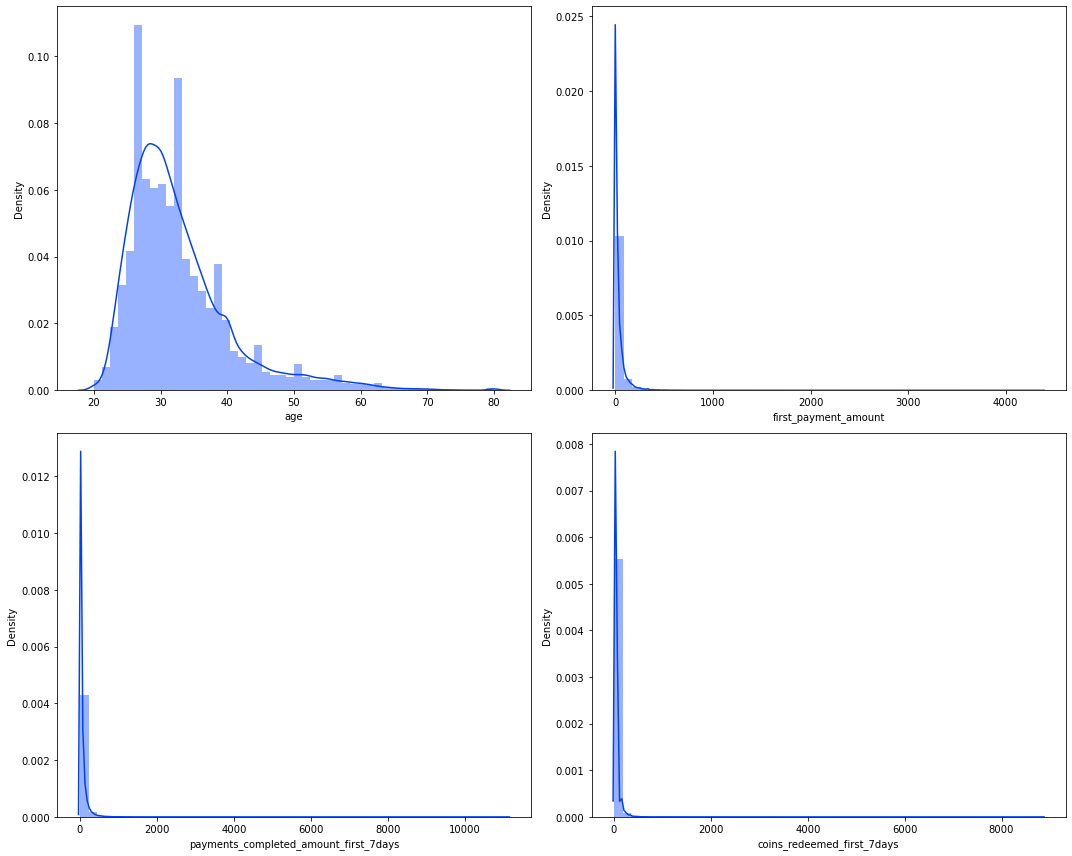

In [22]:
plt.figure(figsize=(15,12))
cols=['age','first_payment_amount','payments_completed_amount_first_7days','coins_redeemed_first_7days']
it=1
for i in cols:
    plt.subplot(2,2,it)
    sns.distplot(df1[i])
    it+=1
plt.tight_layout()
plt.show()

In [23]:
df[['age','first_payment_amount','payments_completed_amount_first_7days','coins_redeemed_first_7days']].skew()

age                                       1.707131
first_payment_amount                     10.356903
payments_completed_amount_first_7days    26.091784
coins_redeemed_first_7days               39.560136
dtype: float64

In [24]:
df[['age','first_payment_amount','payments_completed_amount_first_7days','coins_redeemed_first_7days']].kurt()

age                                         4.067985
first_payment_amount                      296.958183
payments_completed_amount_first_7days    1650.975997
coins_redeemed_first_7days               4353.930210
dtype: float64

## Inference
* none of the continous variable are normally distributed
* age is positive skewed, and somewhat lepokurtic
* first_payment_amount, payment_completed_amount_first_7days, coins_redeemed_first_7days are very positively skewed and very lepokurtic

## Boxplot and count plot of numerical variables

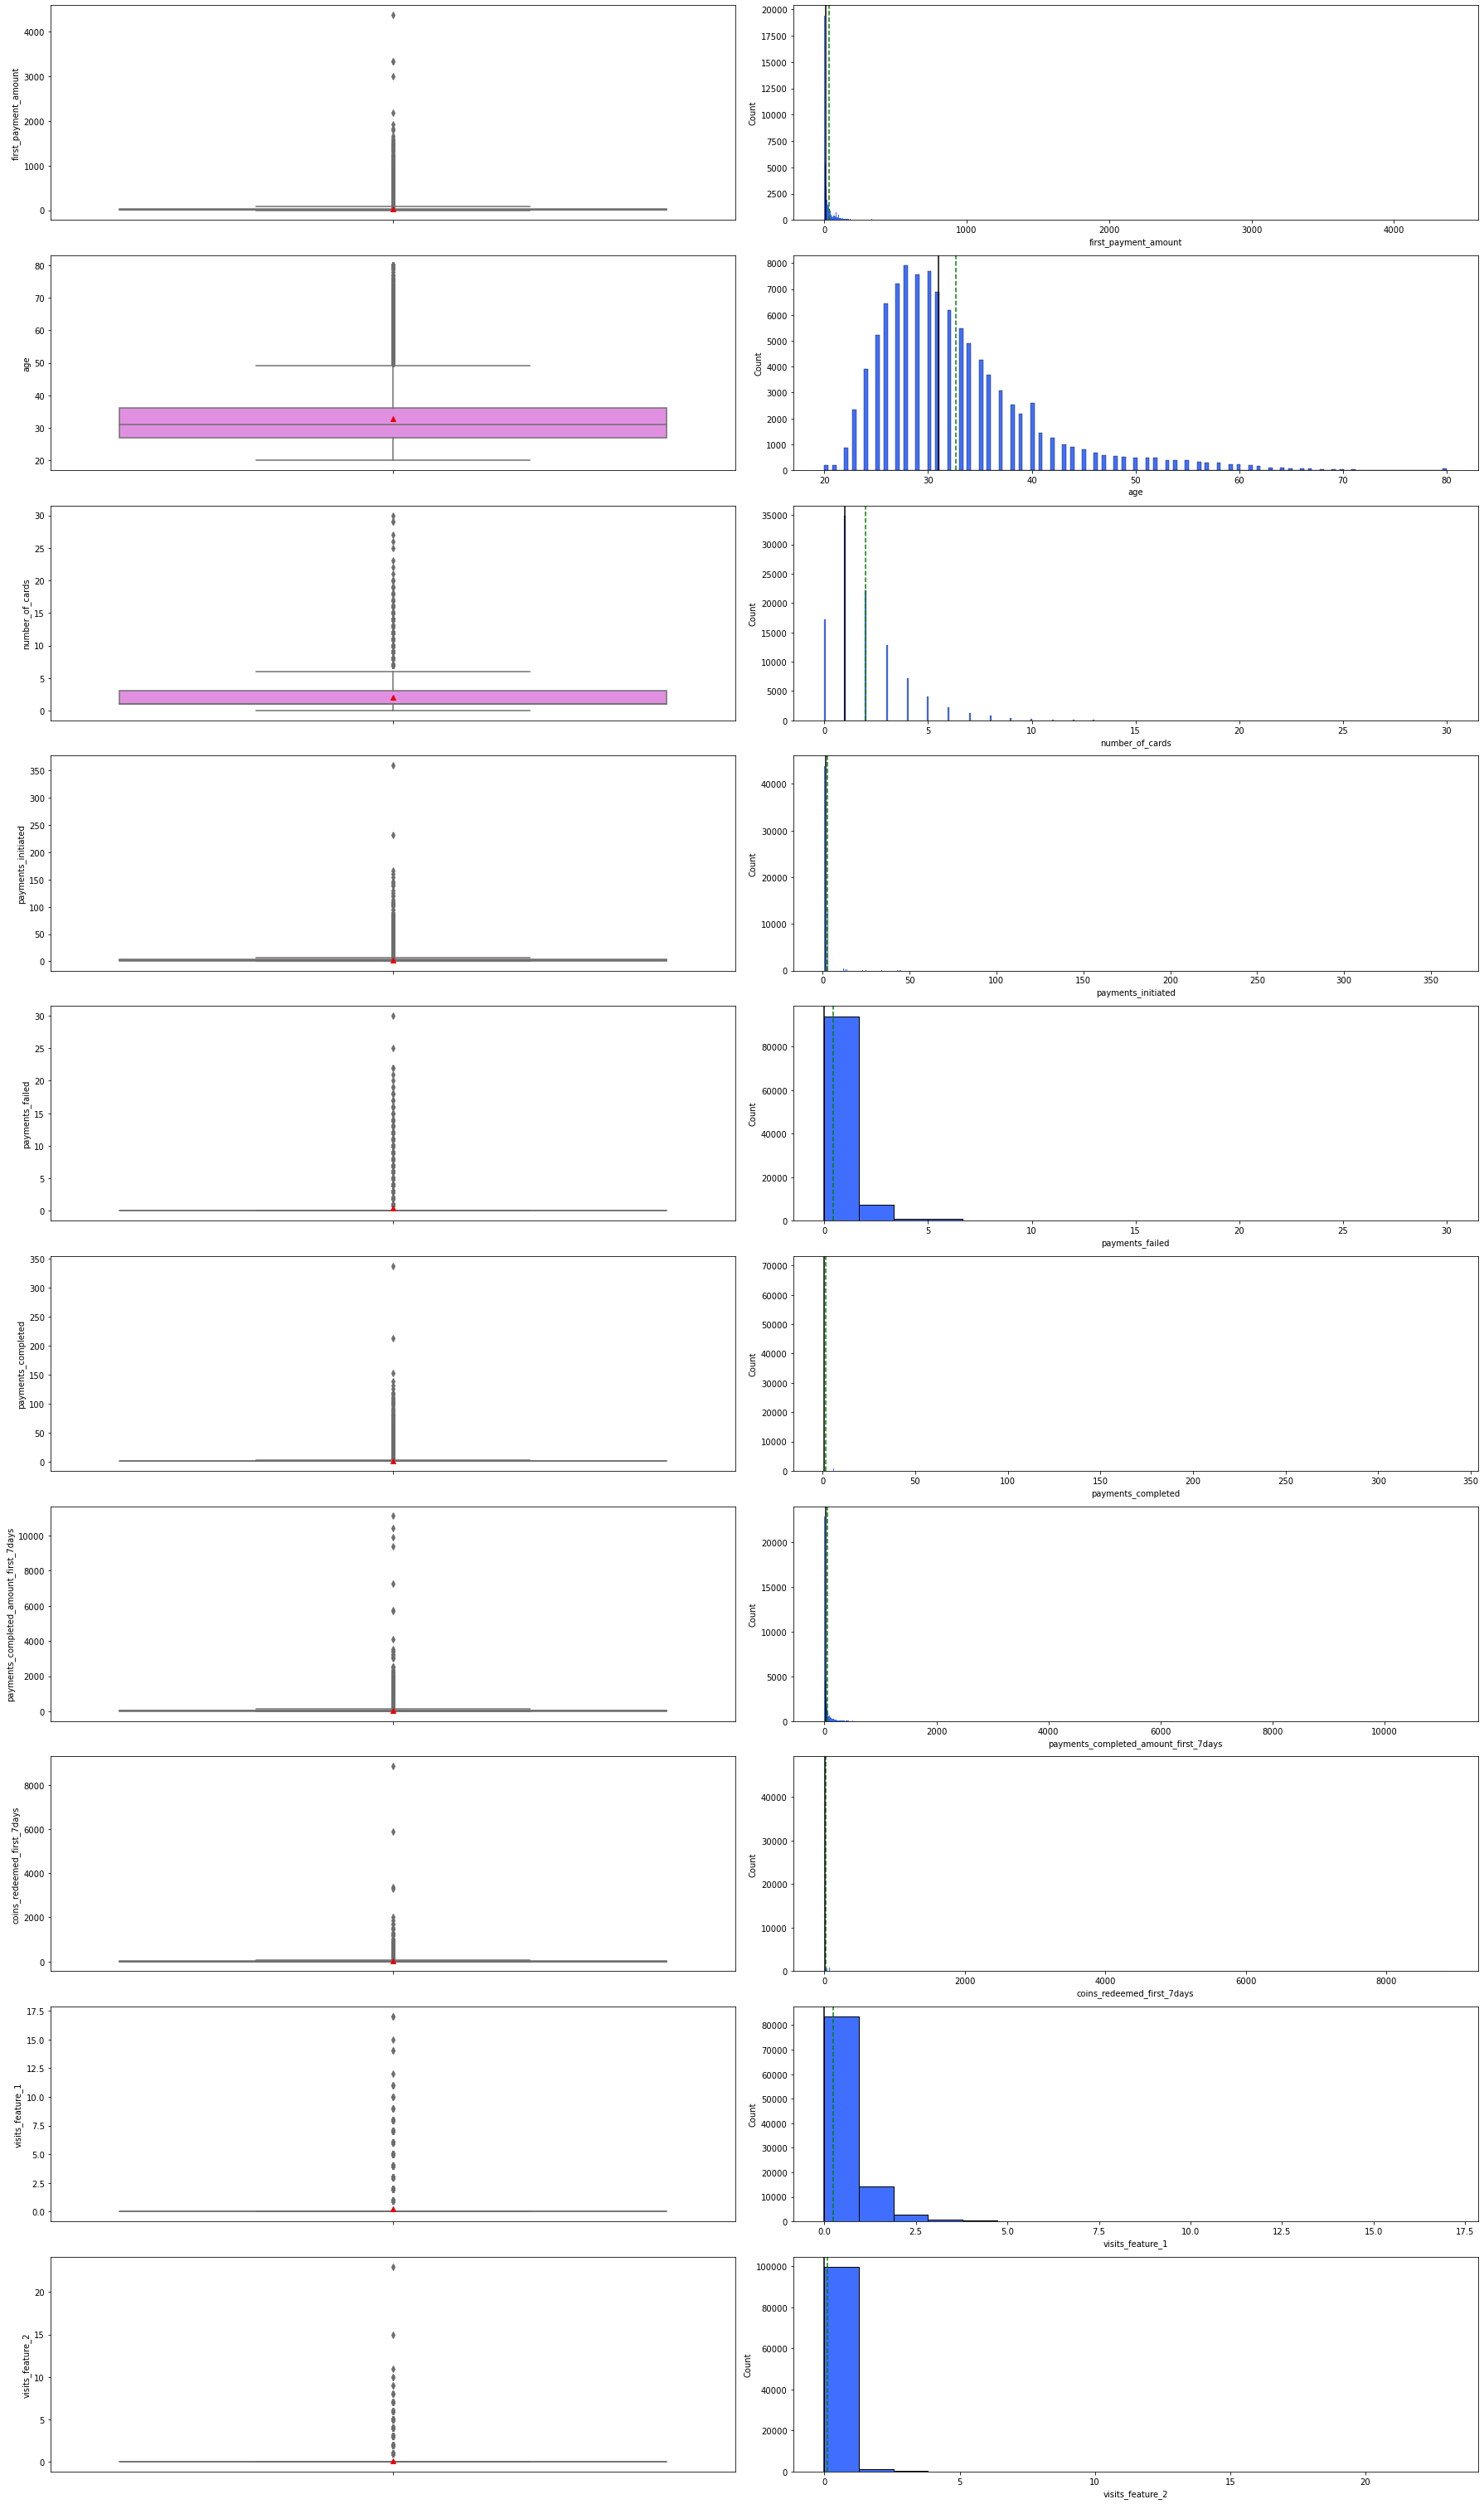

In [25]:
plt.figure(figsize=(25,50))
cols=df1.select_dtypes(include=np.number)
it=1
for i in cols:
    plt.subplot(12,2,it)
    sns.boxplot(data=df1, y=i, showmeans=True, color="violet")
    it+=1
    plt.subplot(12,2,it)
    sns.histplot(data=df1, x=i)
    plt.axvline(df1[i].mean(), linestyle="--", color="green")
    plt.axvline(df1[i].median(), linestyle="-", color="black")
    it+=1
plt.tight_layout()
plt.show()

### Inference:
* significant amount of outliers are present in all the numerical variables.
* and none of the variable are normally distributed.
* we can try removal of outlier or capping the extreme outliers or building the model with outliers.
* we can try yeo jhonson or box-cox transformation to normalise the data.

In [26]:
def first_payment_amt_bin(x):
    if x==0:
        return x
    else:
        return 1

In [27]:
df1['first_payment']=df1['first_payment_amount'].apply(first_payment_amt_bin)

In [28]:
count=round(df1['first_payment'].value_counts(normalize=True)*100,2)

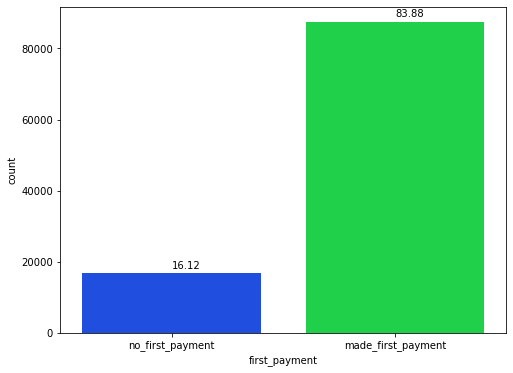

In [29]:
sns.countplot(df1['first_payment'])
labels=['no_first_payment','made_first_payment']
x=[0,1]
plt.text(x=0,y=18000,s=count[0])
plt.text(x=1,y=89000,s=count[1])
plt.xticks(x,labels)
plt.show()

### Inference :
* 83.88 percent users have made there first payment , whereas 16.12 people have not made first payment

## Count plots of discrete variables

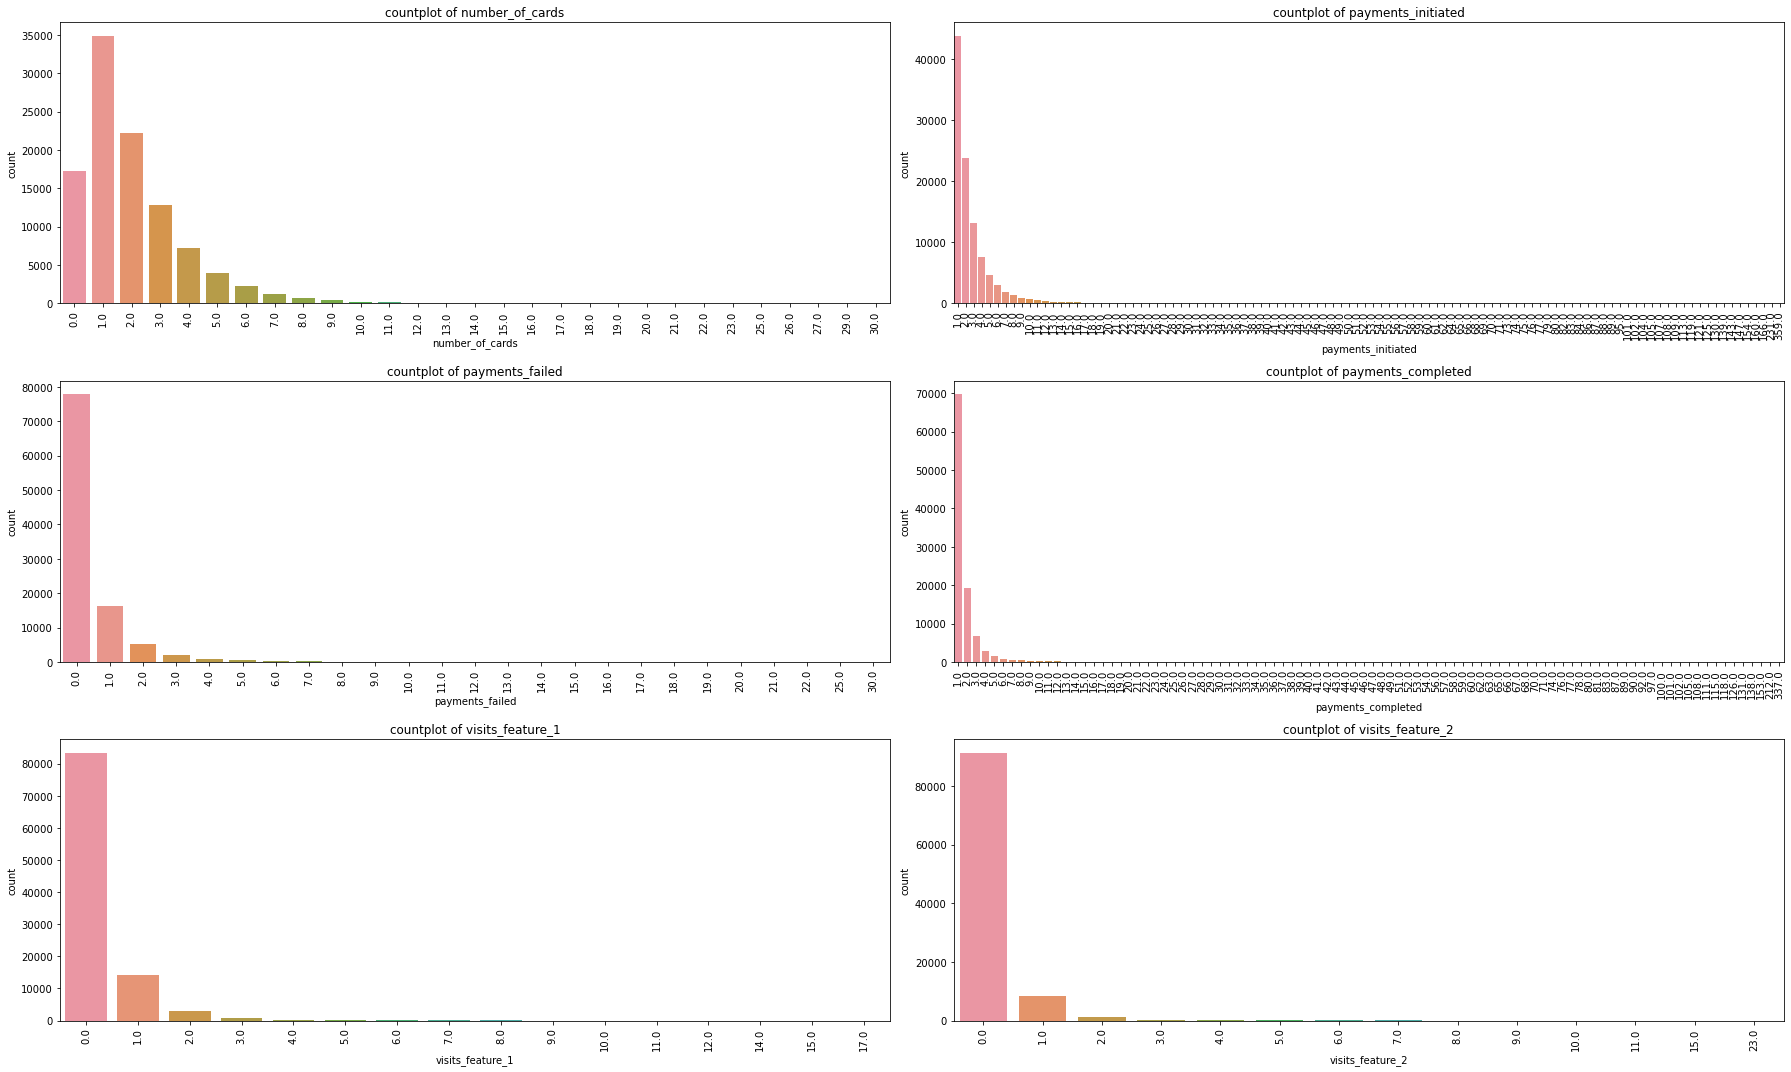

In [30]:
plt.figure(figsize=(25,15))
cols=['number_of_cards','payments_initiated', 'payments_failed', 'payments_completed', 'visits_feature_1', 'visits_feature_2']
it=1
for i in cols:
    plt.subplot(3,2,it)
    sns.countplot(df1[i])
    plt.title('countplot of {}'.format(i))
    plt.xticks(rotation=90)
    it+=1
plt.tight_layout()
plt.show()

### inference
* most people are having 1 or 2 cards.
* most people have initiated payment 1 time
* for significantly more people payment has failed 0 times
* significantly more people have completed their payment 1 time
* majority of people haven't visited feature_1 and feature_2

## Categorical variables

In [31]:
count=df1['is_churned'].value_counts()

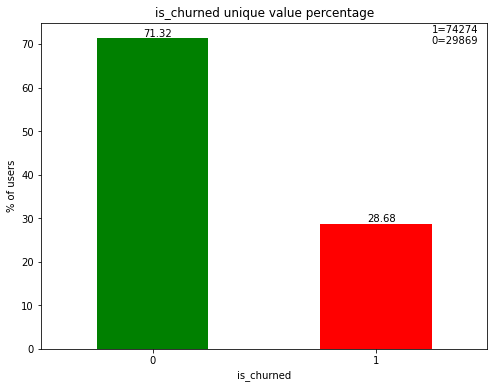

In [32]:
plt.figure(figsize=(8,6))
round((df1['is_churned'].value_counts()/len(df1))*100,2).plot(kind='bar',color=['green','red'])
plt.text(x=0.96,y=round((df1['is_churned'].value_counts()/len(df1))*100,2)[1]+0.5,s=round((df1['is_churned'].value_counts()/len(df1))*100,2)[1])
plt.text(x=-0.04,y=round((df1['is_churned'].value_counts()/len(df1))*100,2)[0]+0.5,s=round((df1['is_churned'].value_counts()/len(df1))*100,2)[0])
plt.xticks(rotation=0)
plt.xlabel('is_churned')
plt.ylabel('% of users')
plt.text(x=1.25,y=70,s='1={}\n0={}'.format(count[0],count[1]))
plt.title('is_churned unique value percentage')
plt.show()

### Inference
* There are 75.72% unchurned users and 24.28% churned users in the dataset , this means our data is somewhat imbalanced

In [33]:
major_devices = ['xiaomi','samsung','apple','oneplus','vivo','oppo']
def device_club(x):
    if x in major_devices:
        return x
    else:
        return "other"

In [34]:
df1['devices_clubed']=df1['device'].apply(device_club)

In [35]:
df1.columns

Index(['device', 'first_payment_amount', 'age', 'city', 'number_of_cards',
       'payments_initiated', 'payments_failed', 'payments_completed',
       'payments_completed_amount_first_7days', 'coins_redeemed_first_7days',
       'is_referral', 'visits_feature_1', 'visits_feature_2',
       'given_permission_1', 'given_permission_2', 'is_churned',
       'first_payment', 'devices_clubed'],
      dtype='object')

## Count plots of categorical variable 

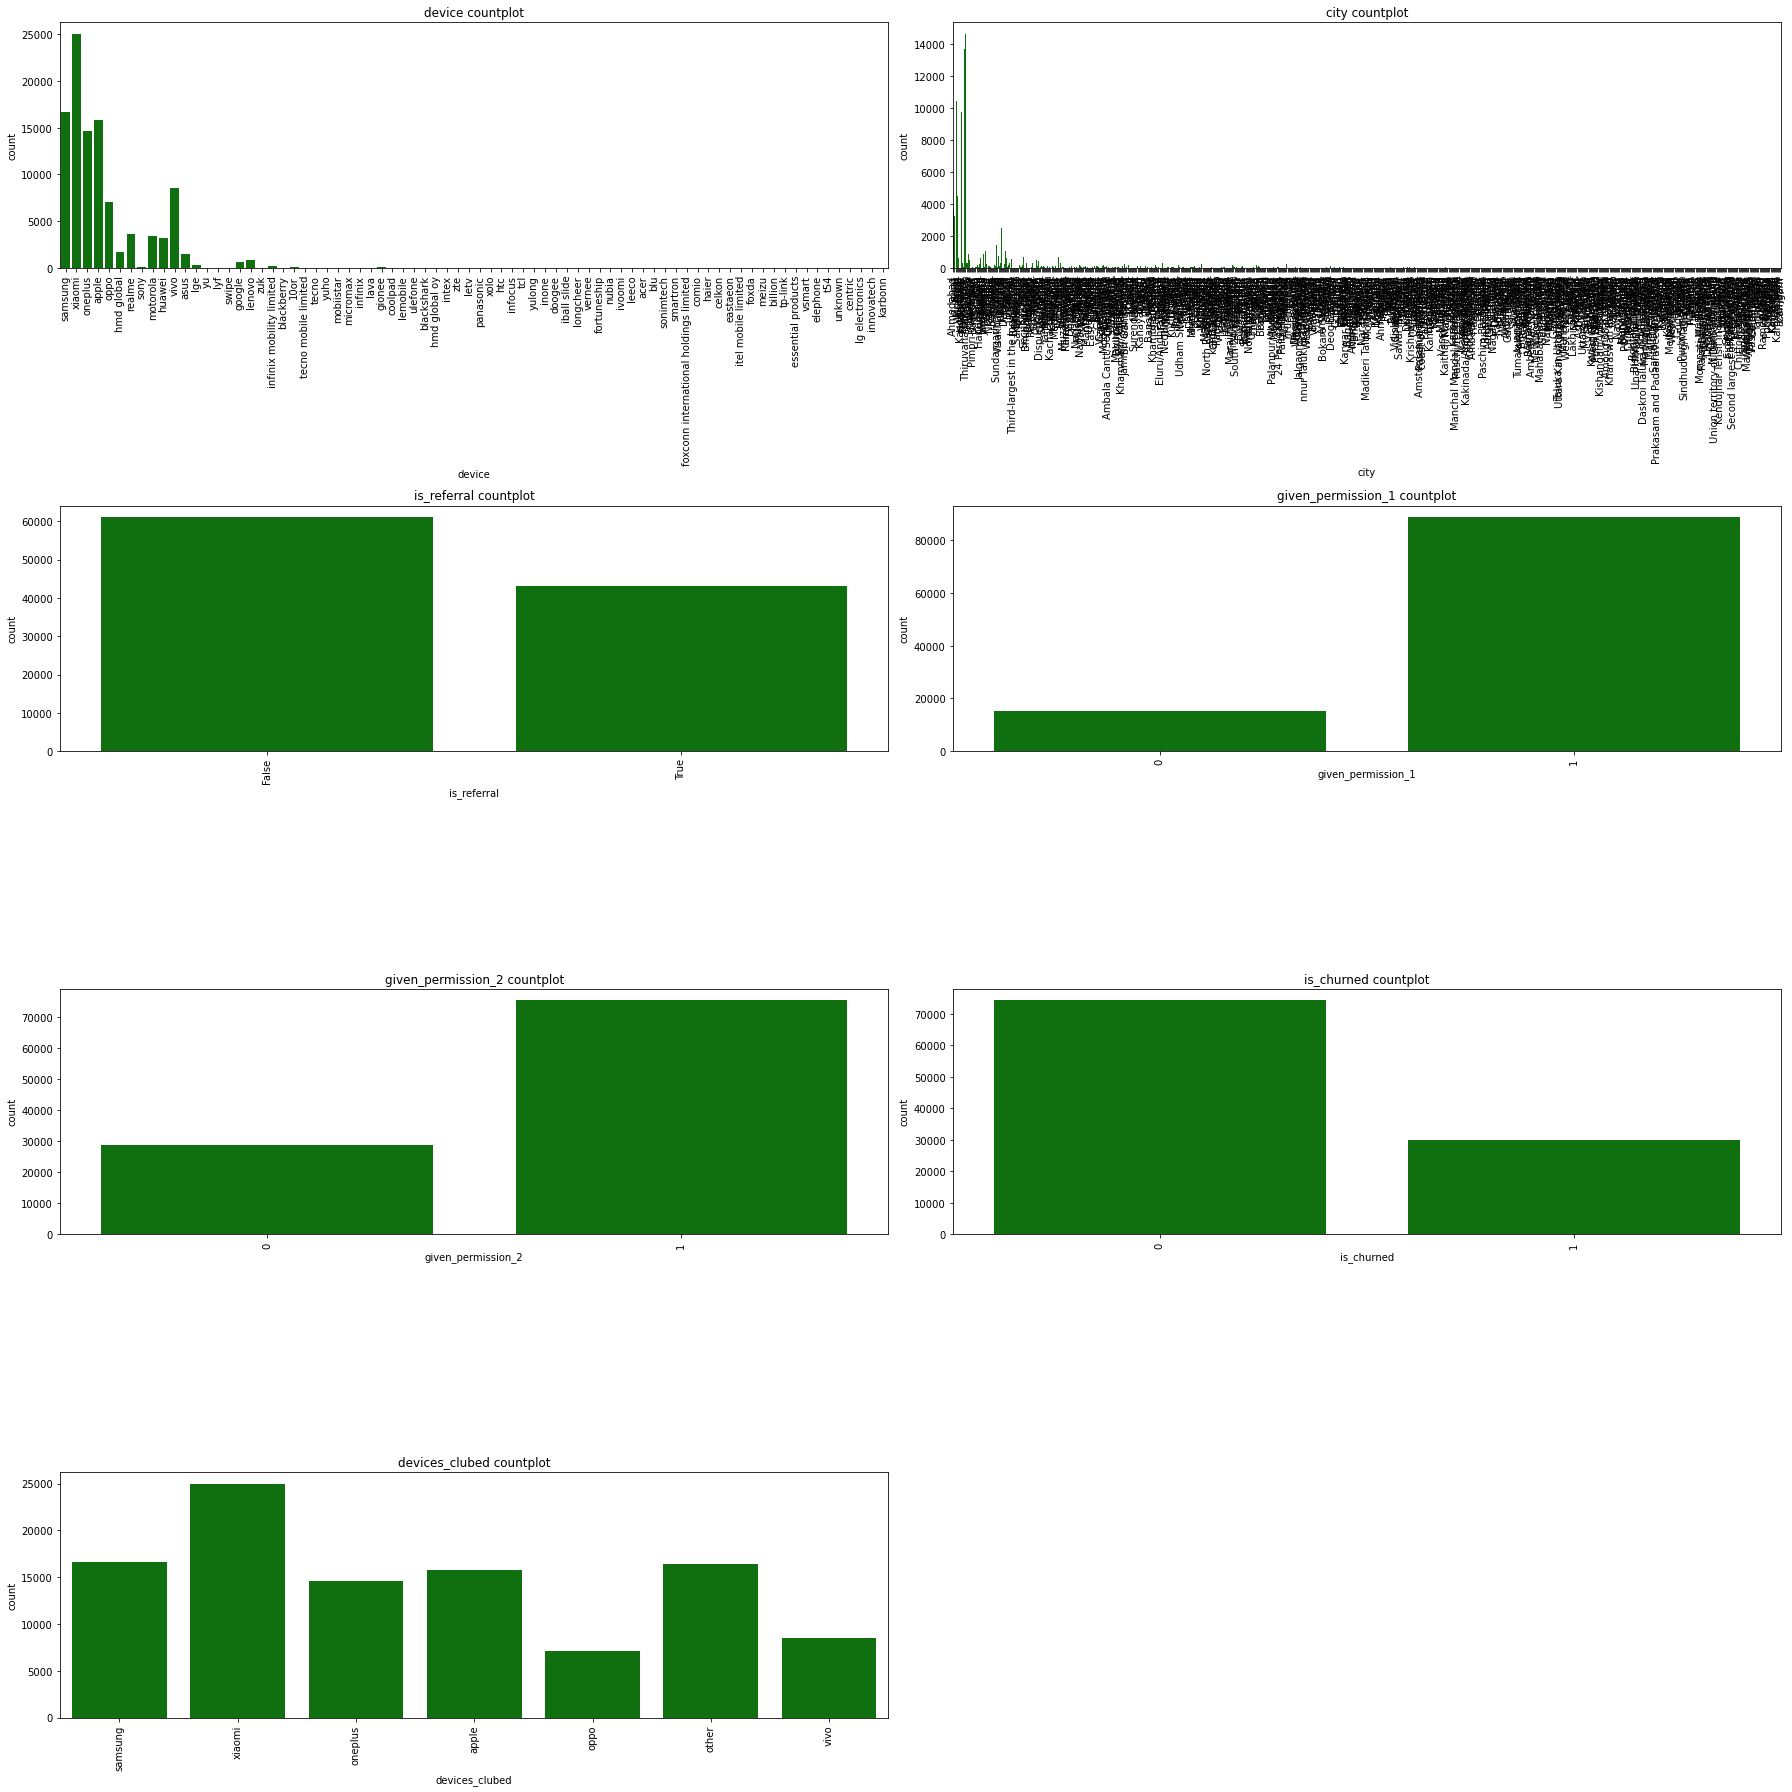

In [36]:
it=1

plt.figure(figsize=(25,25))
for feature in df1.select_dtypes(include='object').columns.to_list():
    plt.subplot(4,2,it)
    sns.countplot(data=df1, x=feature, color="green")
    plt.xticks(rotation=90)
    plt.title(label=('{} countplot'.format(feature)))
    it+=1
plt.tight_layout()
plt.show()

### inference

* Major devices like samsung, apple, Xiaomi,oppo,vivo have considerably more number of counts than other devices.
* considerably more number of people are not referred users.
* significantly more users have given permission to 1 and 2 access.

## Bivariate analysis

## cat vs numerical

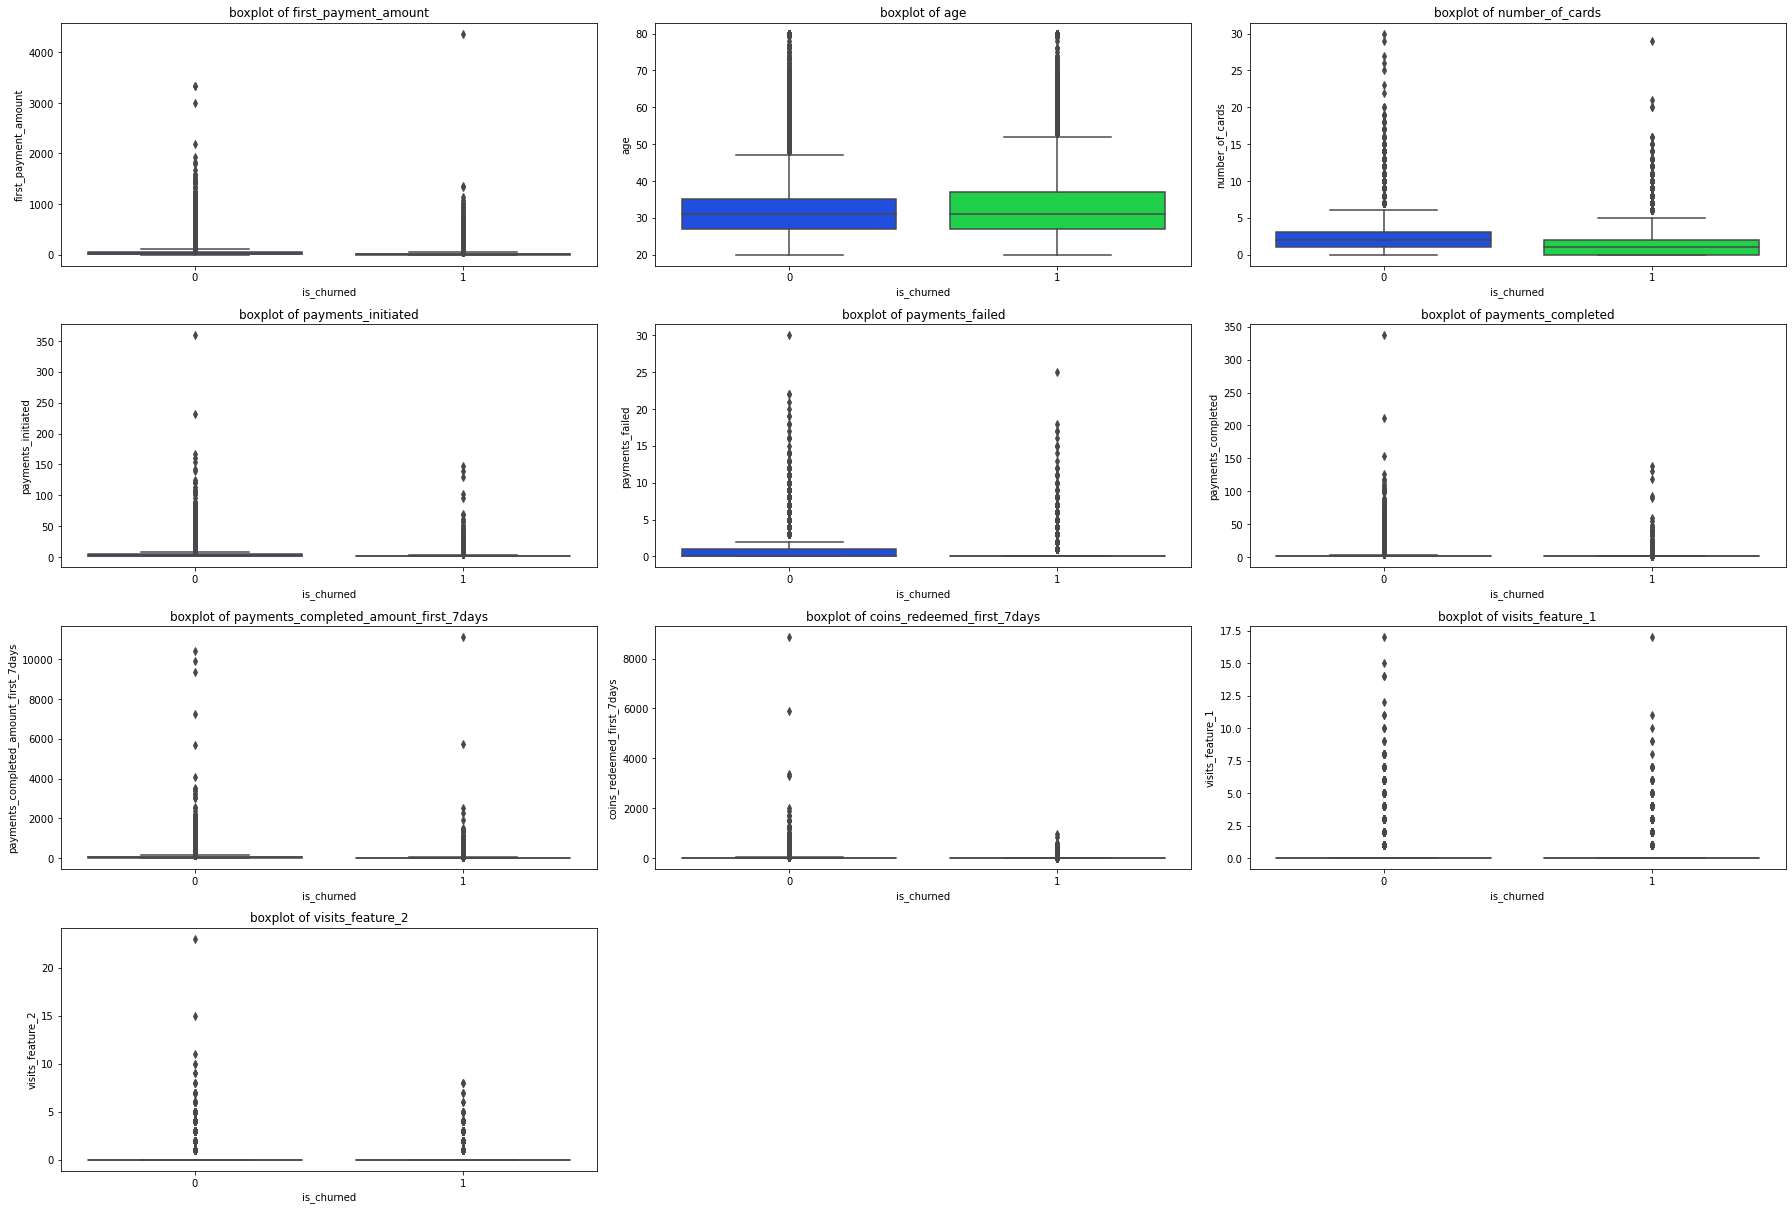

In [37]:
plt.figure(figsize=(25,50))
it=1
for i in df.select_dtypes(include=np.number).columns.to_list():
    plt.subplot(12,3,it)
    sns.boxplot(y=df[i],x=df['is_churned'])
    plt.title('boxplot of {}'.format(i))
    it+=1
plt.tight_layout()
plt.show()

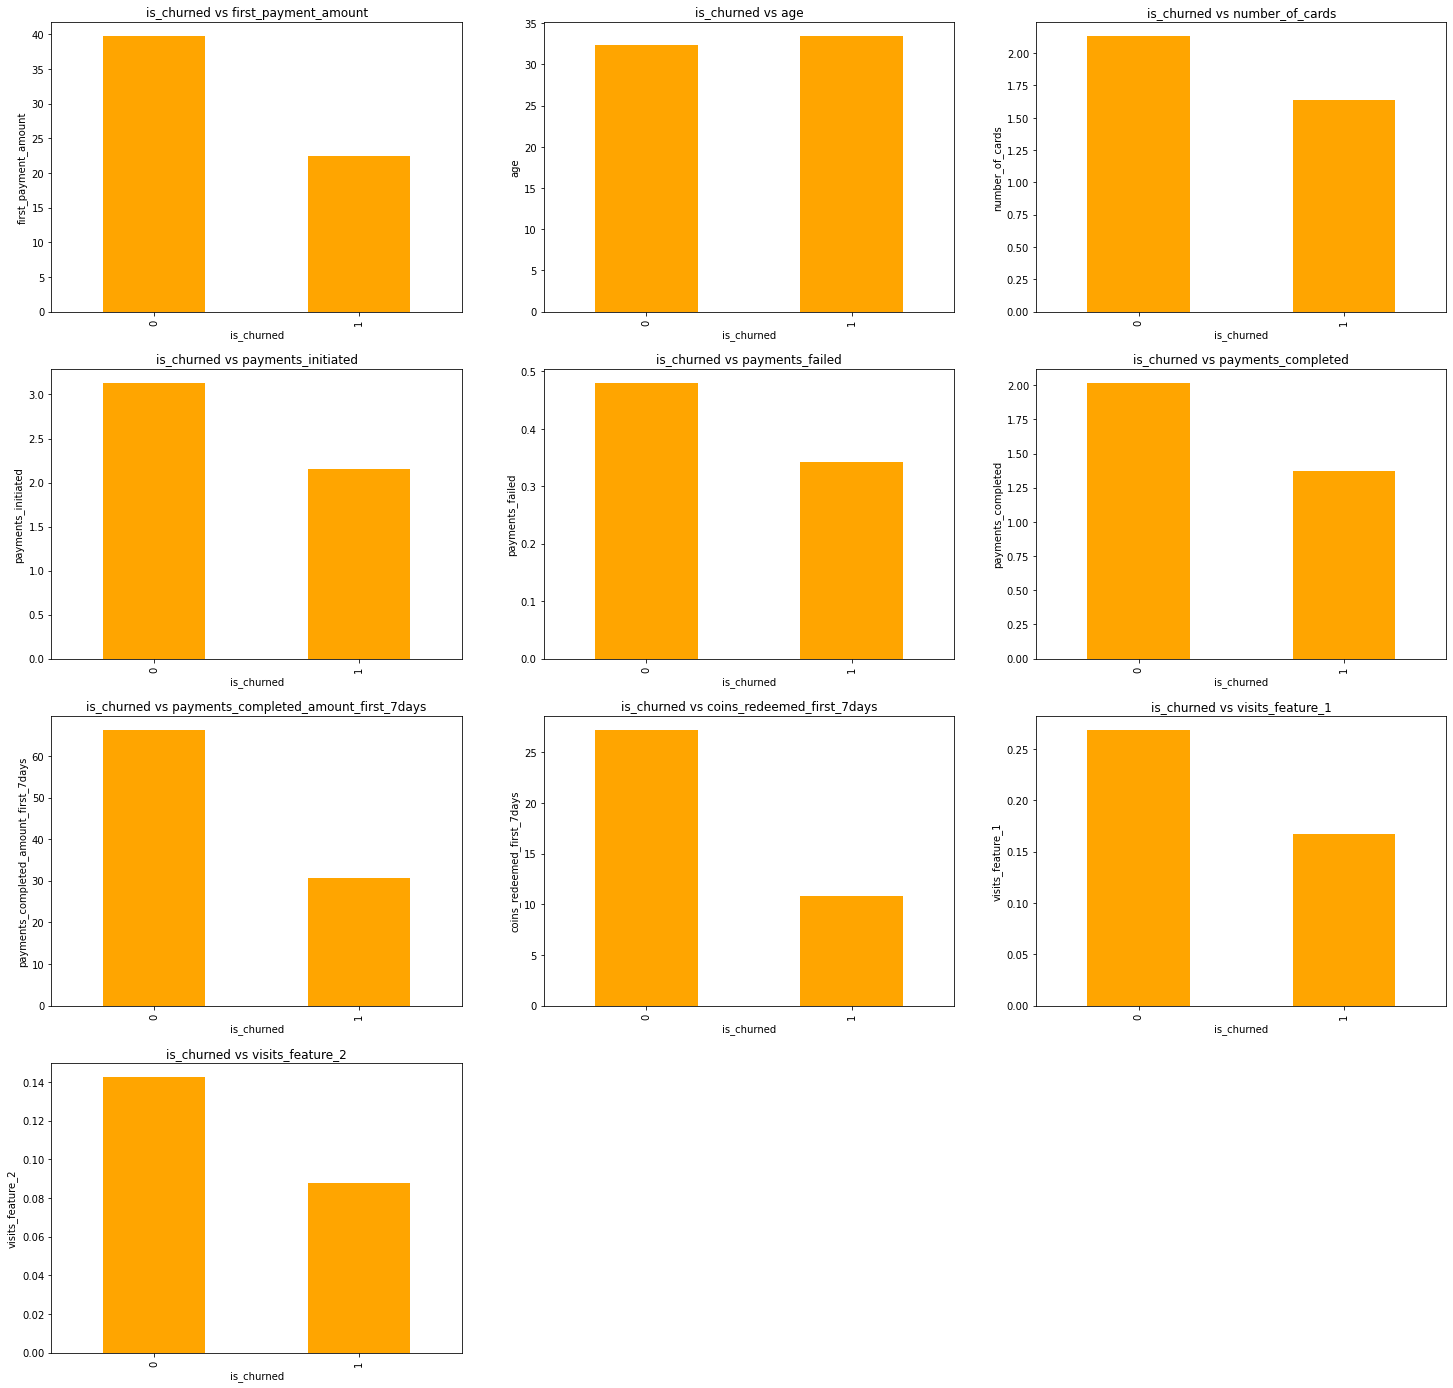

In [38]:
plt.figure(figsize=(25,50))
it=1
for col in df.select_dtypes(include=np.number).columns:
    plt.subplot(8,3,it)
    df.groupby('is_churned')[col].mean().plot(kind="bar", color="orange")
    plt.ylabel(col)
    plt.title("is_churned vs {}".format(col))
    it+=1
plt.show()

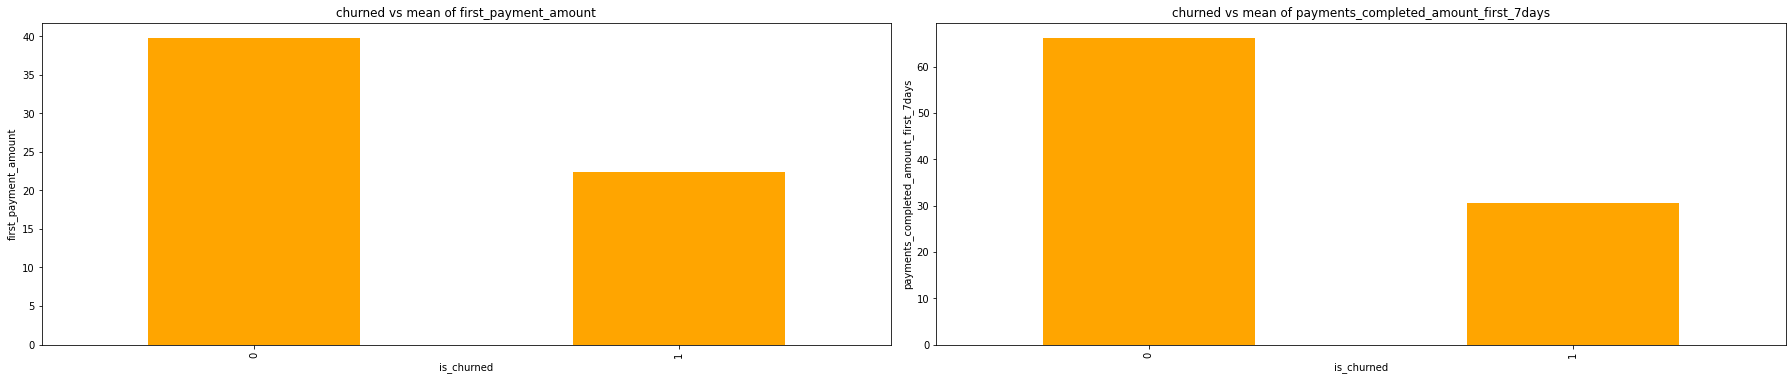

In [39]:
plt.figure(figsize=(25,10))
col=['first_payment_amount','payments_completed_amount_first_7days']
it=1
for i in col:
    plt.subplot(2,2,it)
    df1.groupby('is_churned')[i].mean().plot(kind="bar", color="orange")
    plt.ylabel(i)
    plt.title('churned vs mean of {}'.format(i))
    it+=1
plt.tight_layout()
plt.show()

### inference :
* the mean of people first payment and payment_completed_amount_first_7days is significantly lower in churning people than in staying people
* the mean of age of people churning is a little more than mean of ageof people not churning.

## cat vs cat

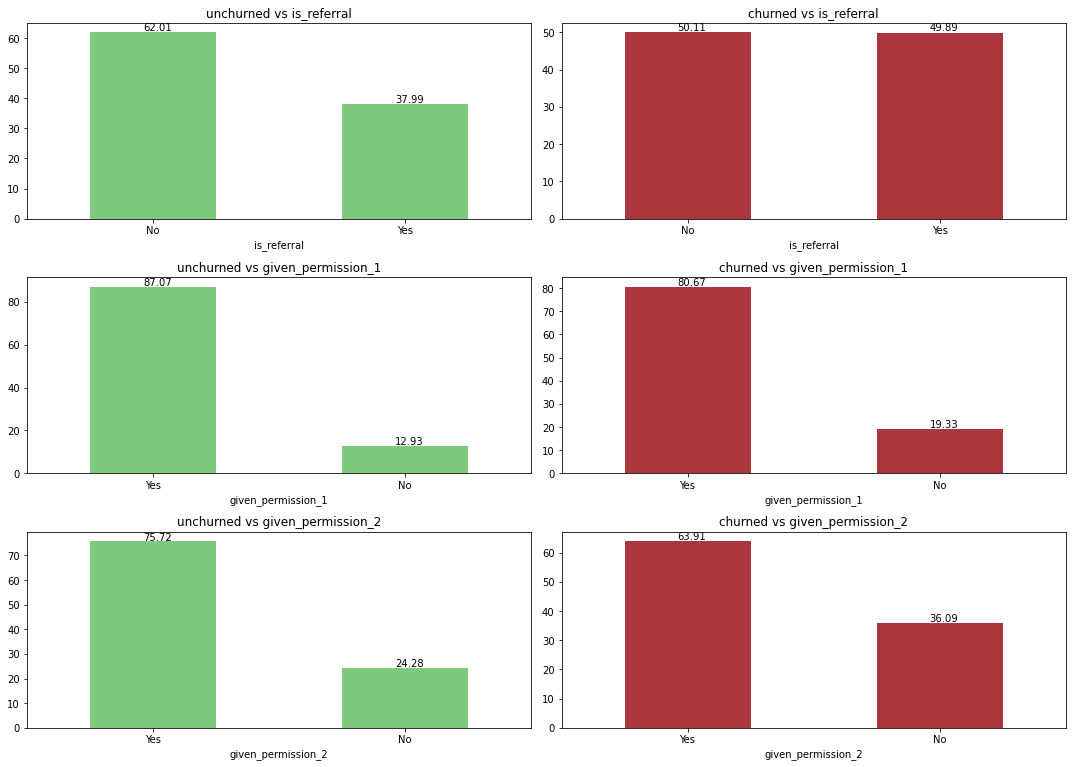

In [40]:
temp5=df[['is_referral','given_permission_1', 'given_permission_2','is_churned']]
dict1={1:'Yes',0:'No'}
dict2={False:'No',True:'Yes'}
temp5['given_permission_1']=temp5['given_permission_1'].map(dict1)
temp5['given_permission_2']=temp5['given_permission_2'].map(dict1)
temp5['is_referral']=temp5['is_referral'].map(dict2)

plt.figure(figsize=(15,28))

cols=['is_referral','given_permission_1', 'given_permission_2']
it=1
for i in cols:
    unchurned=temp5[temp5['is_churned']==0][i]
    churned=temp5[temp5['is_churned']==1][i]
    
    plt.subplot(8,2,it)
    round((unchurned.value_counts()/len(unchurned))*100,2).plot(kind='bar', colormap='Accent')
    plt.text(x=0.96,y=round((unchurned.value_counts()/len(unchurned))*100,2)[1]+0.5,s=round((unchurned.value_counts()/len(unchurned))*100,2)[1])
    plt.text(x=-0.04,y=round((unchurned.value_counts()/len(unchurned))*100,2)[0]+0.5,s=round((unchurned.value_counts()/len(unchurned))*100,2)[0])
    plt.xticks(rotation=0)
    plt.xlabel(i)
    plt.title('unchurned vs {}'.format(i))
    it+=1
    
    plt.subplot(8,2,it)
    round((churned.value_counts()/len(churned))*100,2).plot(kind='bar', colormap='vlag_r')
    plt.text(x=0.96,y=round((churned.value_counts()/len(churned))*100,2)[1]+0.5,s=round((churned.value_counts()/len(churned))*100,2)[1])
    plt.text(x=-0.04,y=round((churned.value_counts()/len(churned))*100,2)[0]+0.5,s=round((churned.value_counts()/len(churned))*100,2)[0])
    plt.xticks(rotation=0)
    plt.xlabel(i)
    plt.title('churned vs {}'.format(i))
    it+=1
    
plt.tight_layout()
plt.show()

### referred users and is_churned

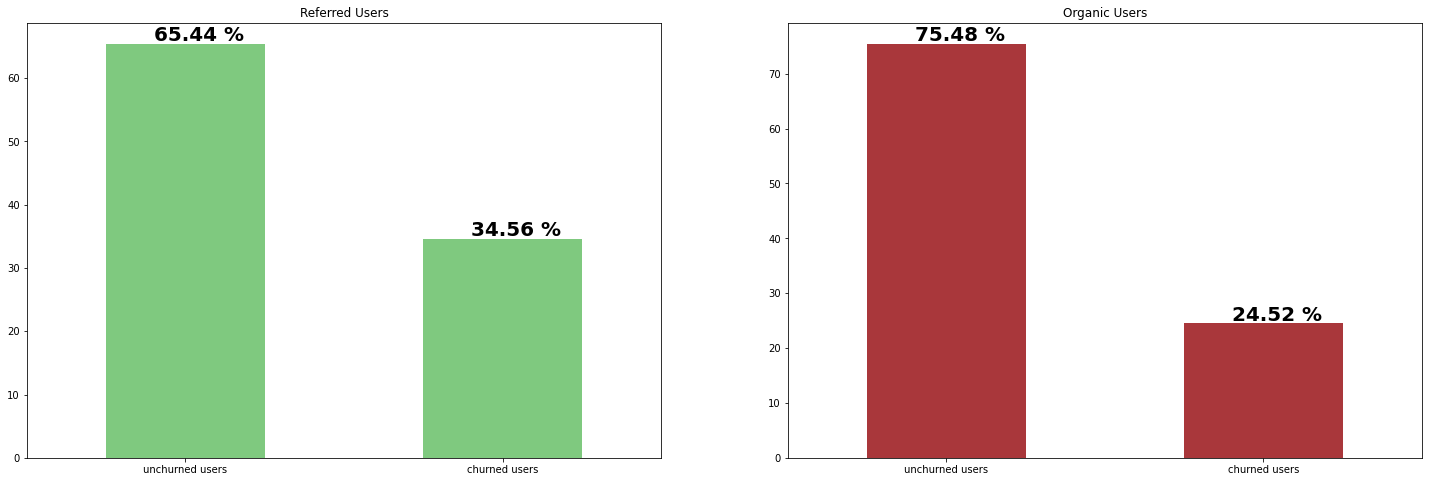

In [41]:
temp5=df[['is_referral','given_permission_1', 'given_permission_2','is_churned']]

referred=temp5[temp5['is_referral']==True]['is_churned']
organic=temp5[temp5['is_referral']==False]['is_churned']

plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
round((referred.value_counts()/len(referred))*100,2).plot(kind='bar', colormap='Accent')
plt.text(x=0.9,y=round((referred.value_counts()/len(referred))*100,2)[1]+0.5,s='{} %'.format(round((referred.value_counts()/len(referred))*100,2)[1]),weight='extra bold',fontsize=20)
plt.text(x=-0.1,y=round((referred.value_counts()/len(referred))*100,2)[0]+0.5,s='{} %'.format(round((referred.value_counts()/len(referred))*100,2)[0]),weight='extra bold',fontsize=20)
plt.xticks(rotation=0)
plt.title('Referred Users')
plt.xticks([0,1],['unchurned users','churned users'])

plt.subplot(1,2,2)
round((organic.value_counts()/len(organic))*100,2).plot(kind='bar', colormap='vlag_r')
plt.text(x=0.9,y=round((organic.value_counts()/len(organic))*100,2)[1]+0.5,s='{} %'.format(round((organic.value_counts()/len(organic))*100,2)[1]),weight='extra bold',fontsize=20)
plt.text(x=-0.1,y=round((organic.value_counts()/len(organic))*100,2)[0]+0.5,s='{} %'.format(round((organic.value_counts()/len(organic))*100,2)[0]),weight='extra bold',fontsize=20)
plt.xticks(rotation=0)
plt.title('Organic Users')
plt.xticks([0,1],['unchurned users','churned users'])
plt.show()

### inference 
* figure shows that referred churned users are more than organic churned users .
* This indicates that most of the  referred people are coming into the service to claim reward and than churning out of the service
* The given_permission_1 and given_permission_2 seems to have no affect on churning

### reffered users and first payment made

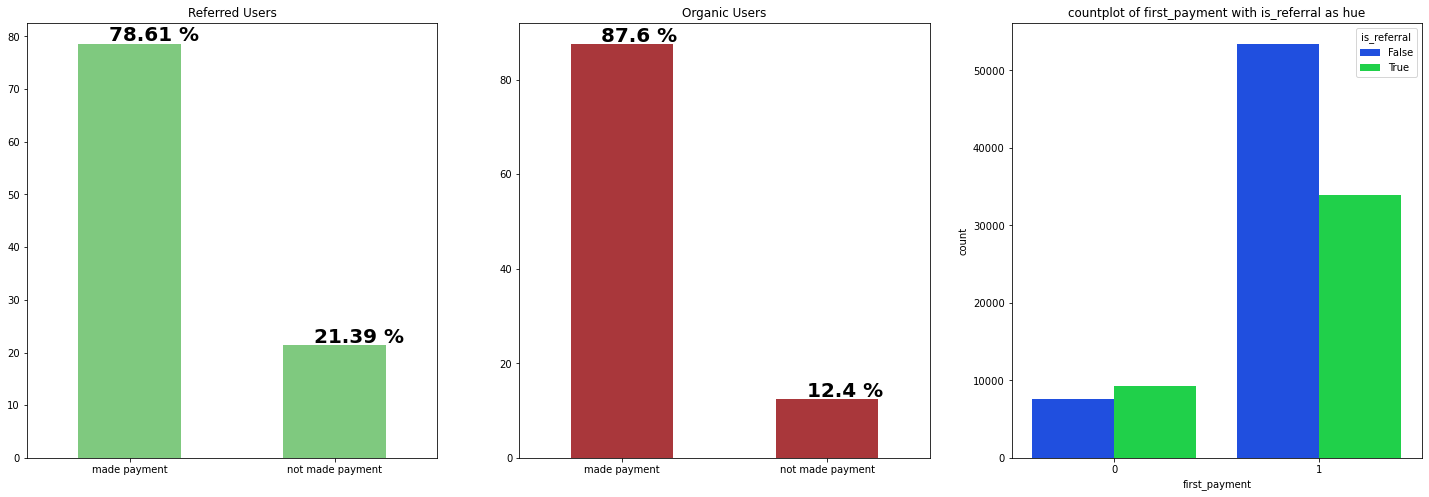

In [42]:


temp5=df1[['is_referral','given_permission_1', 'given_permission_2','is_churned','first_payment']]

referred=temp5[temp5['is_referral']==True]['first_payment']
organic=temp5[temp5['is_referral']==False]['first_payment']

plt.figure(figsize=(25,8))

plt.subplot(1,3,1)
round((referred.value_counts()/len(referred))*100,2).plot(kind='bar', colormap='Accent')
plt.text(x=0.9,y=round((referred.value_counts()/len(referred))*100,2)[0]+0.5,s='{} %'.format(round((referred.value_counts()/len(referred))*100,2)[0]),weight='extra bold',fontsize=20)
plt.text(x=-0.1,y=round((referred.value_counts()/len(referred))*100,2)[1]+0.5,s='{} %'.format(round((referred.value_counts()/len(referred))*100,2)[1]),weight='extra bold',fontsize=20)
plt.xticks(rotation=0)
plt.title('Referred Users')
plt.xticks([0,1],['made payment','not made payment'])

plt.subplot(1,3,2)
round((organic.value_counts()/len(organic))*100,2).plot(kind='bar', colormap='vlag_r')
plt.text(x=0.9,y=round((organic.value_counts()/len(organic))*100,2)[0]+0.5,s='{} %'.format(round((organic.value_counts()/len(organic))*100,2)[0]),weight='extra bold',fontsize=20)
plt.text(x=-0.1,y=round((organic.value_counts()/len(organic))*100,2)[1]+0.5,s='{} %'.format(round((organic.value_counts()/len(organic))*100,2)[1]),weight='extra bold',fontsize=20)
plt.xticks(rotation=0)
plt.title('Organic Users')
plt.xticks([0,1],['made payment','not made payment'])

plt.subplot(1,3,3)
sns.countplot(data=df1,x=df1['first_payment'],hue='is_referral')
plt.title('countplot of first_payment with is_referral as hue')
plt.show()

plt.show()


### first_payment_amount inference
* the count of referred user not making first_payment is higher than count of organic user not making first payment . 
* this indicates that refered people are mostly coming into the service to claim some monetary reward.
* so urging them to make their first payment might help making them stay on the service

### Device vs payment

In [43]:
major_devices = ['xiaomi','samsung','apple','oneplus','vivo','oppo']
def device_club(x):
    if x in major_devices:
        return x
    else:
        return "other"
    

In [44]:
df1.columns

Index(['device', 'first_payment_amount', 'age', 'city', 'number_of_cards',
       'payments_initiated', 'payments_failed', 'payments_completed',
       'payments_completed_amount_first_7days', 'coins_redeemed_first_7days',
       'is_referral', 'visits_feature_1', 'visits_feature_2',
       'given_permission_1', 'given_permission_2', 'is_churned',
       'first_payment', 'devices_clubed'],
      dtype='object')

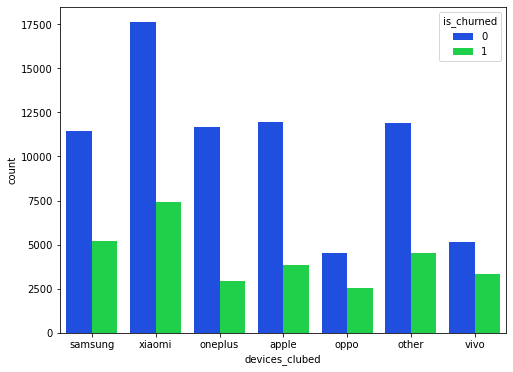

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(df1['devices_clubed'],hue=df1['is_churned'])
plt.show()

### Inference:
* High-end device users have churned less as compared to budget phone users.


### Multivariate analysis

#### correlation matrix

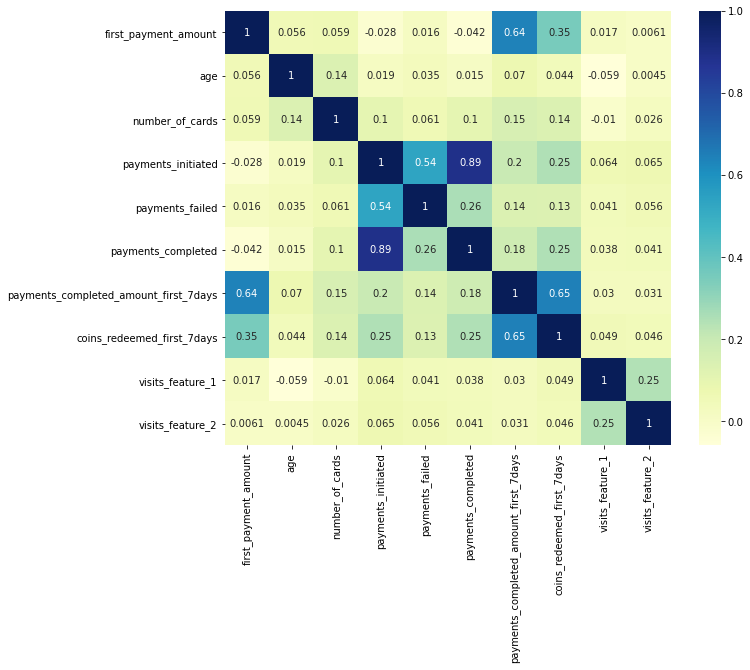

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',)
plt.show()

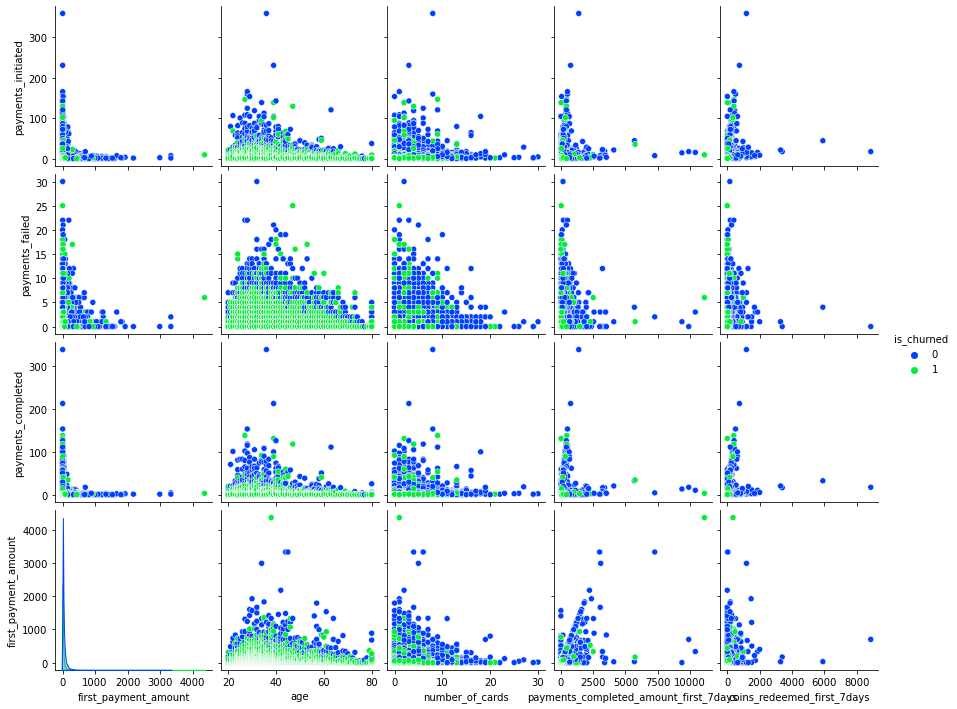

In [47]:
sns.pairplot(data=df,x_vars=['first_payment_amount', 'age','number_of_cards','payments_completed_amount_first_7days', 'coins_redeemed_first_7days'],y_vars=['payments_initiated', 'payments_failed', 'payments_completed','first_payment_amount'],hue='is_churned')
plt.show()

creating a column to see if coustumer has made 0 first payment but has made payment in first 7 days 
vice versa

### Inference
* Pair plot shows that numerical columns appears to have no relationship with each other.
* Although we can observe that churned users have less number of payments initiated, payments_completed, payments_failed than unchurned users
* Mostly older people are making zero first payment and churning out of the service

### device column vs payment columns 

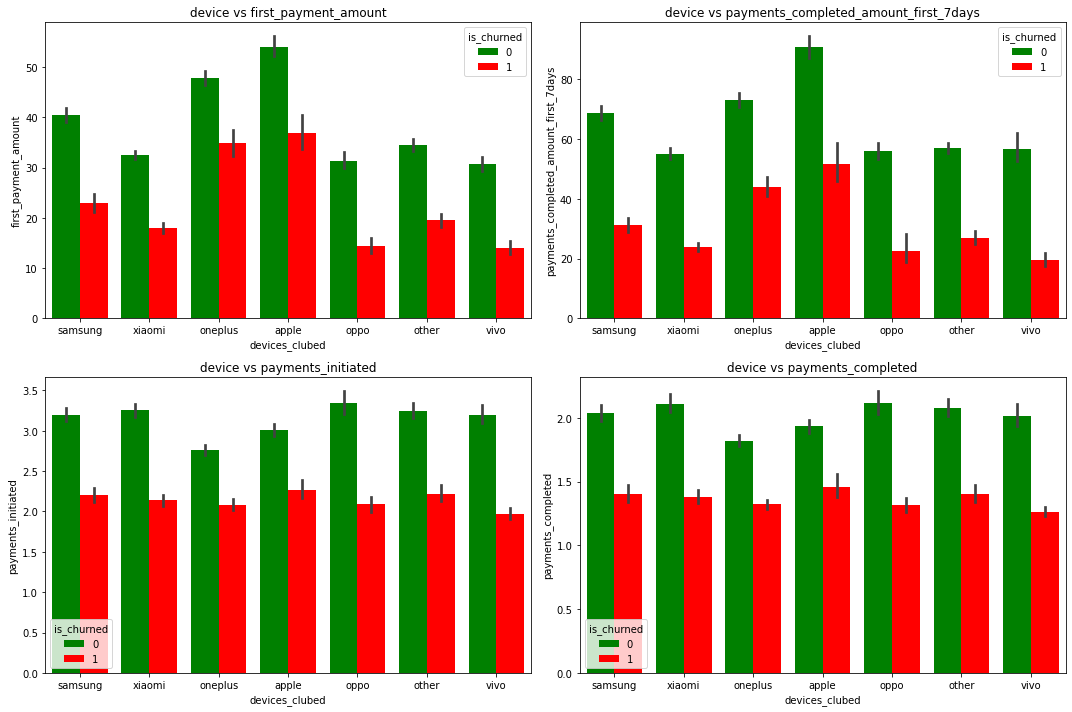

In [48]:

col=[ 'first_payment_amount','payments_completed_amount_first_7days','payments_initiated' ,'payments_completed']
it=1
plt.figure(figsize=(15,10))
for i in col:
    plt.subplot(2,2,it)
    sns.barplot(x=df1['devices_clubed'],y=df1[i],hue=df1['is_churned'],palette=['green','red'],saturation=1)
    plt.title('device vs {}'.format(i))
    it+=1
plt.tight_layout()
plt.show()

### Inference :
* User device seems to have no to very less impact on payment variables

# Conformatory Data Analysis

## Numerical variables : 

### Mann whitney u test :

* H0 : no significant difference between two samples (independent variable)
* Ha : significant difference between two samples . (dependent variable)
* where:
* `U1 = n1*n2 + n1(n1+1)/2 - R1`
* `U2 = n1*n2 + n2(n2+1)/2 - R2`
* n1: number of samples in sample 1
* n2: number of samples in sample 2
* R1: Rank sum of sample 1
* R2: Rank sum of sample 2

In [49]:
cols = ['first_payment_amount', 'age','payments_completed_amount_first_7days', 'coins_redeemed_first_7days',]
dependent=[]
independent=[]
for i in cols:
    print('---------------------------------------------------------------------------------------------------------------')
    print()
    print('Two sample mean test for the column '.format(i))
    print()
    group0=df[df['is_churned']==0][i]
    group1=df[df['is_churned']==1][i]
    stat, p = mannwhitneyu(group0, group1)
    if p>0.05 :
        print('the pvalue is {}'.format(p))
        print('since pvalue is greater than 0.05 we fail to reject the null hypothesis ')
        independent.append(i)
        print()
    else:
        print('the pvalue is {}'.format(p))
        print('since the pvalue is less than 0.05 we reject the null hypothesis ')
        dependent.append(i)
        print()
print('the variables which are independent with target variables are ',independent)
print('the variables which are not independent with target variables are ',dependent)

---------------------------------------------------------------------------------------------------------------

Two sample mean test for the column 

the pvalue is 0.0
since the pvalue is less than 0.05 we reject the null hypothesis 

---------------------------------------------------------------------------------------------------------------

Two sample mean test for the column 

the pvalue is 1.9084093841707032e-30
since the pvalue is less than 0.05 we reject the null hypothesis 

---------------------------------------------------------------------------------------------------------------

Two sample mean test for the column 

the pvalue is 0.0
since the pvalue is less than 0.05 we reject the null hypothesis 

---------------------------------------------------------------------------------------------------------------

Two sample mean test for the column 

the pvalue is 0.0
since the pvalue is less than 0.05 we reject the null hypothesis 

the variables which are independent w

## Discrete variable:

### Chi2 contengeny test

* H0: both the variables are independent. i.e, no relation exists between both the variable.
* H1: both the variables are not independent. i.e, relation exits between both the variable.

In [50]:
dependent =[]
independent=[]
cols=['number_of_cards','payments_initiated','payments_failed', 'payments_completed','visits_feature_1', 'visits_feature_2']
for i in cols:
    print('------------------------------------------------------------------------------------------------------------')
    print()
    print('chi2 contegency test between {} and {} variables'.format(i,'is_churned'))
    print()
    count=pd.crosstab(df[i],df['is_churned'])
    chi2,p,ddof,exp=chi2_contingency(count,correction=False)
    if p>=0.05 :
        print('the pvalue is {} , and since the pvalue is greater than 0.05 we fail to reject the null hypothesis'.format(p))
        print('the {} and is_churned variable are independent variable'.format(i))
        print()
        independent.append(i)
    else:
        print('the pvalue is {} , and since the pvalue is less than 0.05 we reject the null hypothesis'.format(p))
        print('the {} and is_churned variable are dependent variable'.format(i))
        print()
        dependent.append(i)
print('the variables which are independent with target variables are ',independent)
print('the variables which are not independent with target variables are ',dependent)


------------------------------------------------------------------------------------------------------------

chi2 contegency test between number_of_cards and is_churned variables

the pvalue is 0.0 , and since the pvalue is less than 0.05 we reject the null hypothesis
the number_of_cards and is_churned variable are dependent variable

------------------------------------------------------------------------------------------------------------

chi2 contegency test between payments_initiated and is_churned variables

the pvalue is 0.0 , and since the pvalue is less than 0.05 we reject the null hypothesis
the payments_initiated and is_churned variable are dependent variable

------------------------------------------------------------------------------------------------------------

chi2 contegency test between payments_failed and is_churned variables

the pvalue is 6.70302750159035e-92 , and since the pvalue is less than 0.05 we reject the null hypothesis
the payments_failed and is_chur

## Categorical variable :

### Chi2 contengeny test

* H0: both the variables are independent. i.e, no relation exists between both the variable.
* H1: both the variables are not independent. i.e, relation exits between both the variable.

In [51]:
dependent =[]
independent=[]
for i in df.select_dtypes(exclude=np.number).columns:
    if i!= 'is_churned':
        print('------------------------------------------------------------------------------------------------------------')
        print()
        print('chi2 contegency test between {} and {} variables'.format(i,'is_churned'))
        print()
        count=pd.crosstab(df[i],df['is_churned'])
        chi2,p,ddof,exp=chi2_contingency(count,correction=False)
        if p>=0.05 :
            print('the pvalue is {} , and since the pvalue is greater than 0.05 we fail to reject the null hypothesis'.format(p))
            print('the {} and is_churned variable are independent variable'.format(i))
            print()
            independent.append(i)
        else:
            print('the pvalue is {} , and since the pvalue is less than 0.05 we reject the null hypothesis'.format(p))
            print('the {} and is_churned variable are dependent variable'.format(i))
            print()
            dependent.append(i)
print('the variables which are independent with target variables are ',independent)
print('the variables which are not independent with target variables are ',dependent)


------------------------------------------------------------------------------------------------------------

chi2 contegency test between device and is_churned variables

the pvalue is 2.7955164830665256e-302 , and since the pvalue is less than 0.05 we reject the null hypothesis
the device and is_churned variable are dependent variable

------------------------------------------------------------------------------------------------------------

chi2 contegency test between city and is_churned variables

the pvalue is 0.0 , and since the pvalue is less than 0.05 we reject the null hypothesis
the city and is_churned variable are dependent variable

------------------------------------------------------------------------------------------------------------

chi2 contegency test between is_referral and is_churned variables

the pvalue is 1.2706871567487983e-272 , and since the pvalue is less than 0.05 we reject the null hypothesis
the is_referral and is_churned variable are dependent vari

### Inference
* All the varibles are showing significance with the target variable so we won't drop any variables and use all the variables for model building

# Base Model

In [52]:
basic=df.copy()

## Base Model Approach :
 * Removing the outliers in all the columns
 * Droping the misiing values
 * frequency encode the city and device column

In [53]:
q1=basic.select_dtypes(include=np.number).quantile(0.25)
q3=basic.select_dtypes(include=np.number).quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [54]:
basic=(basic[~((basic>ul)|(basic<ll)).any(axis=1)]).reset_index()

In [55]:
basic.drop(columns=['index'],inplace=True)

In [56]:
basic.isnull().sum()

device                                     67
first_payment_amount                        0
age                                        55
city                                     2839
number_of_cards                           405
payments_initiated                        405
payments_failed                           405
payments_completed                        405
payments_completed_amount_first_7days     405
coins_redeemed_first_7days                405
is_referral                                 0
visits_feature_1                         1852
visits_feature_2                         1852
given_permission_1                          0
given_permission_2                          0
is_churned                                  0
dtype: int64

In [57]:
basic.dropna(inplace=True)
basic=basic.reset_index()

In [58]:
basic.drop(columns=['index'],inplace=True)

In [59]:
basic.drop(columns=['city','device'],inplace=True)

In [60]:
basic_num=basic.select_dtypes(include=np.number)
basic_cat=basic.select_dtypes(exclude=np.number)

In [61]:
dict1={False:0,True:1}
basic_cat['is_referral']=basic_cat['is_referral'].map(dict1)

In [62]:
basic_cat['given_permission_1']=basic_cat['given_permission_1'].astype('int')

In [63]:
basic_cat['given_permission_2']=basic_cat['given_permission_2'].astype('int')

In [64]:
basic_cat['is_churned']=basic_cat['is_churned'].astype('int')

In [65]:
sc=StandardScaler()
basic_num=pd.DataFrame(data=sc.fit_transform(basic_num),columns=basic_num.columns)

In [66]:
basic=pd.concat([basic_num,basic_cat],axis=1)

In [67]:
x=basic.drop(columns=['is_churned'])
y=basic['is_churned']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

### base model

In [68]:
x_train_c=sm.add_constant(x_train)
x_test_c=sm.add_constant(x_test)
base_model=Logit(y_train,x_train_c).fit(method='bfgs')
base_model.summary()

         Current function value: 0.569304
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_churned   No. Observations:                29179
Model:                          Logit   Df Residuals:                    29168
Method:                           MLE   Df Model:                           10
Date:                Fri, 03 Feb 2023   Pseudo R-squ.:                  0.1150
Time:                        12:28:56   Log-Likelihood:                -16612.
converged:                      False   LL-Null:                       -18770.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5428        nan        nan        nan         nan         nan
first_payment_amount                     -0.4095        nan        nan        nan         nan         nan
age                                       0.1387        nan        nan        nan         nan         nan
number_of_cards                          -0.1900        nan        nan        nan         nan         nan
payments_initiated                       -0.0692        nan        nan        nan         nan         nan
payments_failed                                0        nan        nan        nan         nan         nan
payments_completed                       -0.3187        nan        nan        nan         nan         nan
payments_completed_amount_first_7days    -0.1196        nan        nan        nan         nan         nan
coins_redeemed_first_7days               -0.2171        nan        nan        nan         nan         nan
visits_feature_1                               0        nan        nan        nan         nan         nan
visits_feature_2                               0        nan        nan        nan         nan         nan
is_referral                               0.4518        nan        nan        nan         nan         nan
given_permission_1                       -0.1986        nan        nan        nan         nan         nan
given_permission_2                       -0.4335        nan        nan        nan         nan         nan
=========================================================================================================
"""

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      8214
           1       0.67      0.41      0.51      4292

    accuracy                           0.73     12506
   macro avg       0.71      0.65      0.66     12506
weighted avg       0.72      0.73      0.71     12506



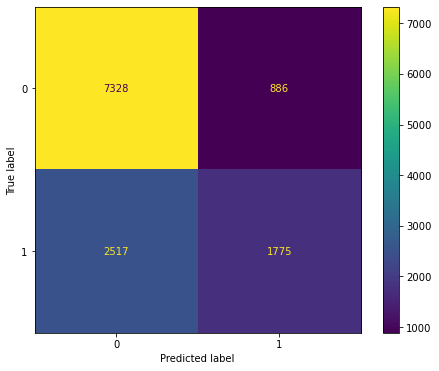

In [69]:
x=basic.drop(columns=['is_churned'])
y=basic['is_churned']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)
lg= LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [208]:
clf = {
    'logistic regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'XGBoost':XGBClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'NaiveBayes':GaussianNB(),
    'BaggingClassifier':BaggingClassifier()
}

kf=KFold(n_splits=10,shuffle=True,random_state=0)
final_model_scores = pd.DataFrame(columns=['model name','recall scores','recall score','variance','roc_auc scores','roc_auc','roc_auc_variance'])

for clf_name,clf in list(zip(clf.keys(),clf.values())):
    print('fitting model .....',clf_name)
    cv=cross_val_score(estimator=clf,X=x,y=y,cv=kf,scoring='recall')
    cv_auc=cross_val_score(estimator=clf,X=x,y=y,cv=kf,scoring='roc_auc')
    t={
        'model name':clf_name,
        'recall scores':cv,
        'recall score':np.mean(cv ),
        'variance':np.std(cv,ddof=1),
        'roc_auc scores':cv_auc,
        'roc_auc':np.mean(cv_auc),
        'roc_auc_variance':np.std(cv_auc,ddof=1)
    }
    final_model_scores = final_model_scores.append(t,ignore_index=True)
final_model_scores=final_model_scores.sort_values(by='recall score',ascending=False)
final_model_scores
    
    

fitting model ..... logistic regression
fitting model ..... KNN
fitting model ..... RandomForest
fitting model ..... DecisionTree
fitting model ..... XGBoost
fitting model ..... AdaBoost
fitting model ..... GradientBoost
fitting model ..... NaiveBayes
fitting model ..... BaggingClassifier


,model name,recall scores,recall score,variance,roc_auc scores,roc_auc,roc_auc_variance
7,NaiveBayes,"[0.7538354253835425, 0.7375438596491228, 0.762...",0.748659,0.011663,"[0.7284944632699216, 0.7081142908291135, 0.718...",0.719386,0.007042
3,DecisionTree,"[0.5327754532775453, 0.5073684210526316, 0.525...",0.520541,0.016336,"[0.6305118065063908, 0.6123607488108026, 0.633...",0.626771,0.010073
8,BaggingClassifier,"[0.49442119944211993, 0.4856140350877193, 0.49...",0.491568,0.009890,"[0.6955525128824909, 0.6885702777351542, 0.692...",0.691468,0.008496
2,RandomForest,"[0.496513249651325, 0.47228070175438597, 0.485...",0.487969,0.013802,"[0.7133289478045584, 0.6959071147255895, 0.704...",0.703546,0.009477
6,GradientBoost,"[0.4804741980474198, 0.4708771929824561, 0.475...",0.486496,0.011843,"[0.7650832868008333, 0.7566257480435783, 0.753...",0.759773,0.008110
5,AdaBoost,"[0.4930264993026499, 0.47157894736842104, 0.46...",0.484683,0.014064,"[0.7616689486714653, 0.755463147665081, 0.7419...",0.755463,0.010267
4,XGBoost,"[0.4825662482566248, 0.4743859649122807, 0.475...",0.483953,0.011287,"[0.7569935160467007, 0.7409306429338653, 0.748...",0.749116,0.009046
0,logistic regression,"[0.41562064156206413, 0.4105263157894737, 0.41...",0.419815,0.010898,"[0.7359309942146717, 0.7232408828192931, 0.726...",0.730839,0.007794
1,KNN,"[0.3472803347280335, 0.3354385964912281, 0.337...",0.338294,0.010251,"[0.6350818079597347, 0.6201450053705693, 0.616...",0.622128,0.008166


## Inference:
* naive bayes is giving the best recall score
* gradientboost classifier is giving the best auc score
* for our buisness problem statement predicting the positive class more accurately becomes priority
* since False negative becomes costlier for buisness , because if churning out customer ie, (1) predicted as false negative ie, (0) we would be loosing out on the customer who are actually leaving the service 
* so recall score becomes our priority here
* so we will take the naive byes algoritm's recall score ie, 0.74 as our base score and improve above that

## Final Model

## Outlier Treatment

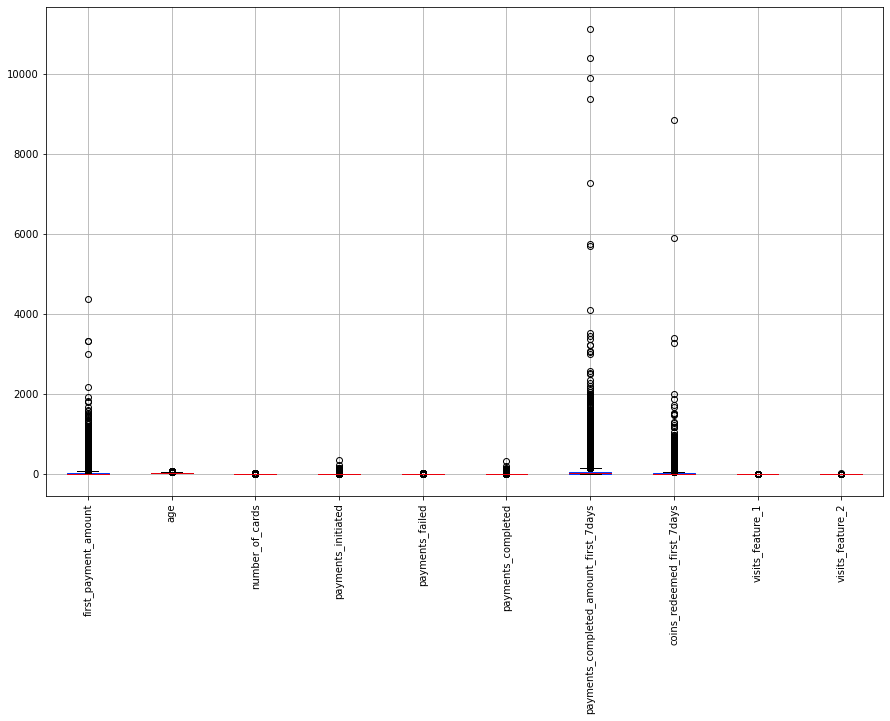

In [70]:
plt.figure(figsize=(15,9))
df.boxplot()
plt.xticks(rotation=90)
plt.plot()
plt.show()

### Capping

In [71]:
capped=df.copy()

In [72]:
for i in ['first_payment_amount','age','payments_completed_amount_first_7days','coins_redeemed_first_7days']:
    ll,q1,q3,ul = capped[i].quantile([0.05,0.25,0.75,0.95])
    UL=q3+(1.5*(q3-q1))
    LL=q1-(1.5*(q3-q1))
    capped[i]=capped[i].map(lambda x : ll if x<LL else ul if x>UL else x)

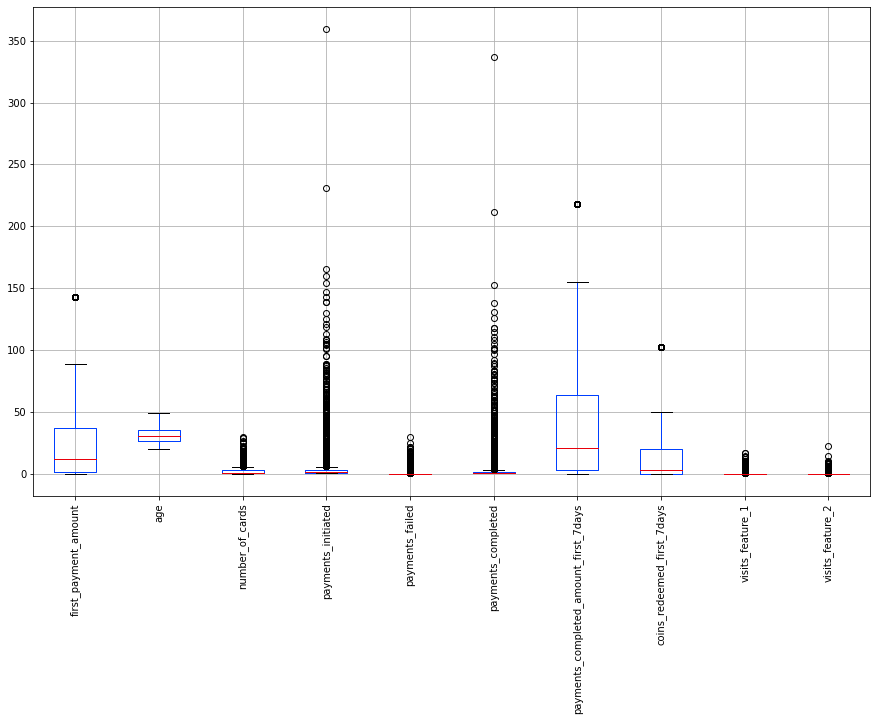

In [73]:
plt.figure(figsize=(15,9))
capped.boxplot()
plt.xticks(rotation=90)
plt.show()

In [74]:
capped.shape

(104143, 16)

### Removing

In [75]:
basic=df.copy()

In [76]:
basic.columns

Index(['device', 'first_payment_amount', 'age', 'city', 'number_of_cards',
       'payments_initiated', 'payments_failed', 'payments_completed',
       'payments_completed_amount_first_7days', 'coins_redeemed_first_7days',
       'is_referral', 'visits_feature_1', 'visits_feature_2',
       'given_permission_1', 'given_permission_2', 'is_churned'],
      dtype='object')

In [77]:
cols=['number_of_cards','payments_initiated', 'payments_failed', 'payments_completed', 'visits_feature_1', 'visits_feature_2']
for i in cols: 
    basic[i]=basic[i].astype('object')

In [78]:
q1=basic.select_dtypes(include=np.number).quantile(0.25)
q3=basic.select_dtypes(include=np.number).quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [79]:
treated=(basic[~((basic>ul)|(basic<ll)).any(axis=1)]).reset_index()

In [80]:
treated.drop(columns=['index'],inplace=True)

In [81]:
cols=['number_of_cards','payments_initiated', 'payments_failed', 'payments_completed', 'visits_feature_1', 'visits_feature_2']
for i in cols: 
    treated[i]=treated[i].astype('float')

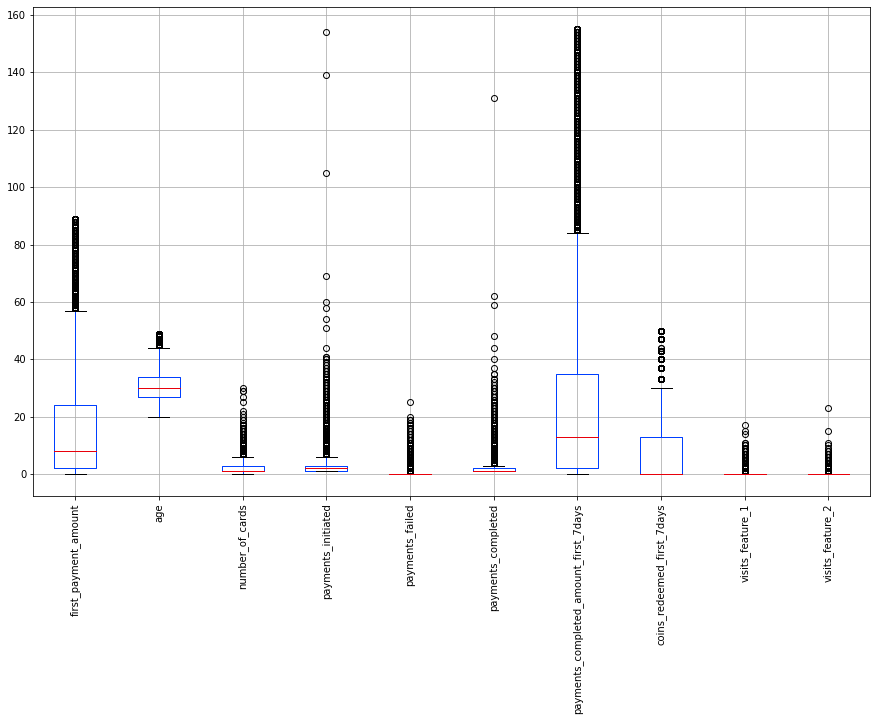

In [82]:
plt.figure(figsize=(15,9))
treated.boxplot()
plt.xticks(rotation=90)
plt.show()

In [83]:
treated.shape

(80318, 16)

### Keeping the outliers

In [84]:
full=df.copy()

In [85]:
full.shape

(104143, 16)

## Missing value Treatment

In [86]:
(full.isnull().sum()/len(full))*100

device                                   0.113306
first_payment_amount                     0.000000
age                                      0.136351
city                                     5.609594
number_of_cards                          0.453223
payments_initiated                       0.453223
payments_failed                          0.453223
payments_completed                       0.453223
payments_completed_amount_first_7days    0.453223
coins_redeemed_first_7days               0.453223
is_referral                              0.000000
visits_feature_1                         2.540737
visits_feature_2                         2.540737
given_permission_1                       0.000000
given_permission_2                       0.000000
is_churned                               0.000000
dtype: float64

In [87]:
(capped.isnull().sum()/len(capped))*100

device                                   0.113306
first_payment_amount                     0.000000
age                                      0.136351
city                                     5.609594
number_of_cards                          0.453223
payments_initiated                       0.453223
payments_failed                          0.453223
payments_completed                       0.453223
payments_completed_amount_first_7days    0.453223
coins_redeemed_first_7days               0.453223
is_referral                              0.000000
visits_feature_1                         2.540737
visits_feature_2                         2.540737
given_permission_1                       0.000000
given_permission_2                       0.000000
is_churned                               0.000000
dtype: float64

In [88]:
(treated.isnull().sum()/len(treated))*100

device                                   0.105829
first_payment_amount                     0.000000
age                                      0.141936
city                                     5.745910
number_of_cards                          0.504246
payments_initiated                       0.504246
payments_failed                          0.504246
payments_completed                       0.504246
payments_completed_amount_first_7days    0.504246
coins_redeemed_first_7days               0.504246
is_referral                              0.000000
visits_feature_1                         2.700515
visits_feature_2                         2.700515
given_permission_1                       0.000000
given_permission_2                       0.000000
is_churned                               0.000000
dtype: float64

### Droping 

* since there are very less null values present in the columns except in city column , droping the null values in all the columns except city column.

In [89]:
capped.columns

Index(['device', 'first_payment_amount', 'age', 'city', 'number_of_cards',
       'payments_initiated', 'payments_failed', 'payments_completed',
       'payments_completed_amount_first_7days', 'coins_redeemed_first_7days',
       'is_referral', 'visits_feature_1', 'visits_feature_2',
       'given_permission_1', 'given_permission_2', 'is_churned'],
      dtype='object')

In [90]:
capped.dropna(inplace=True)
treated.dropna(inplace=True)
full1=full.dropna(subset=['age','device', 'first_payment_amount', 'age','number_of_cards','payments_initiated', 'payments_failed', 'payments_completed',
    'payments_completed_amount_first_7days', 'coins_redeemed_first_7days',
       'is_referral', 'visits_feature_1', 'visits_feature_2',
       'given_permission_1', 'given_permission_2', 'is_churned'],how='any')
full2=full.dropna()

In [91]:
capped=capped.reset_index()
treated=treated.reset_index()
full1=full1.reset_index()
full2=full2.reset_index()

In [92]:
capped=capped.drop(columns=['index'])
treated=treated.drop(columns=['index'])
full1=full1.drop(columns=['index'])
full2=full2.drop(columns=['index'])

## Imputing missing values in city column using KNN Classifier

In [93]:
full1_num=full1.select_dtypes(include=np.number)

In [94]:
full1_num=pd.concat([full1_num,full1['city']],axis=1)


In [95]:
full1_num.head()

,first_payment_amount,age,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,coins_redeemed_first_7days,visits_feature_1,visits_feature_2,city
0,0,20.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,Ahmedabad
1,0,20.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,Surat
2,0,20.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,Kullu
3,0,20.0,2.0,4.0,1.0,2.0,322.0,20.0,0.0,0.0,Mumbai
4,0,20.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Pune


In [96]:
index_list_city=full1_num[full1_num['city'].isnull()].index.to_list()

In [97]:
x_test=full1_num.loc[index_list_city].drop('city',axis=1)

In [98]:
y_test=full1_num.loc[index_list_city]['city']

In [99]:
y_test.head()

27     NaN
65     NaN
77     NaN
99     NaN
117    NaN
Name: city, dtype: object

In [100]:
x_train=full1_num.dropna().drop('city',axis=1)

In [101]:
y_train=full1_num.dropna()['city']

In [102]:
knn=KNeighborsClassifier(n_neighbors=2000)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2000)

In [103]:
y_pred=knn.predict(x_test)

In [104]:
full1_num['city'][index_list_city]=y_pred

In [105]:
full1_cat=full1[['device', 'is_referral','given_permission_1','given_permission_2','is_churned']]

In [106]:
full1=pd.concat([full1_num,full1_cat],axis=1)
full1.isnull().sum()

first_payment_amount                     0
age                                      0
number_of_cards                          0
payments_initiated                       0
payments_failed                          0
payments_completed                       0
payments_completed_amount_first_7days    0
coins_redeemed_first_7days               0
visits_feature_1                         0
visits_feature_2                         0
city                                     0
device                                   0
is_referral                              0
given_permission_1                       0
given_permission_2                       0
is_churned                               0
dtype: int64

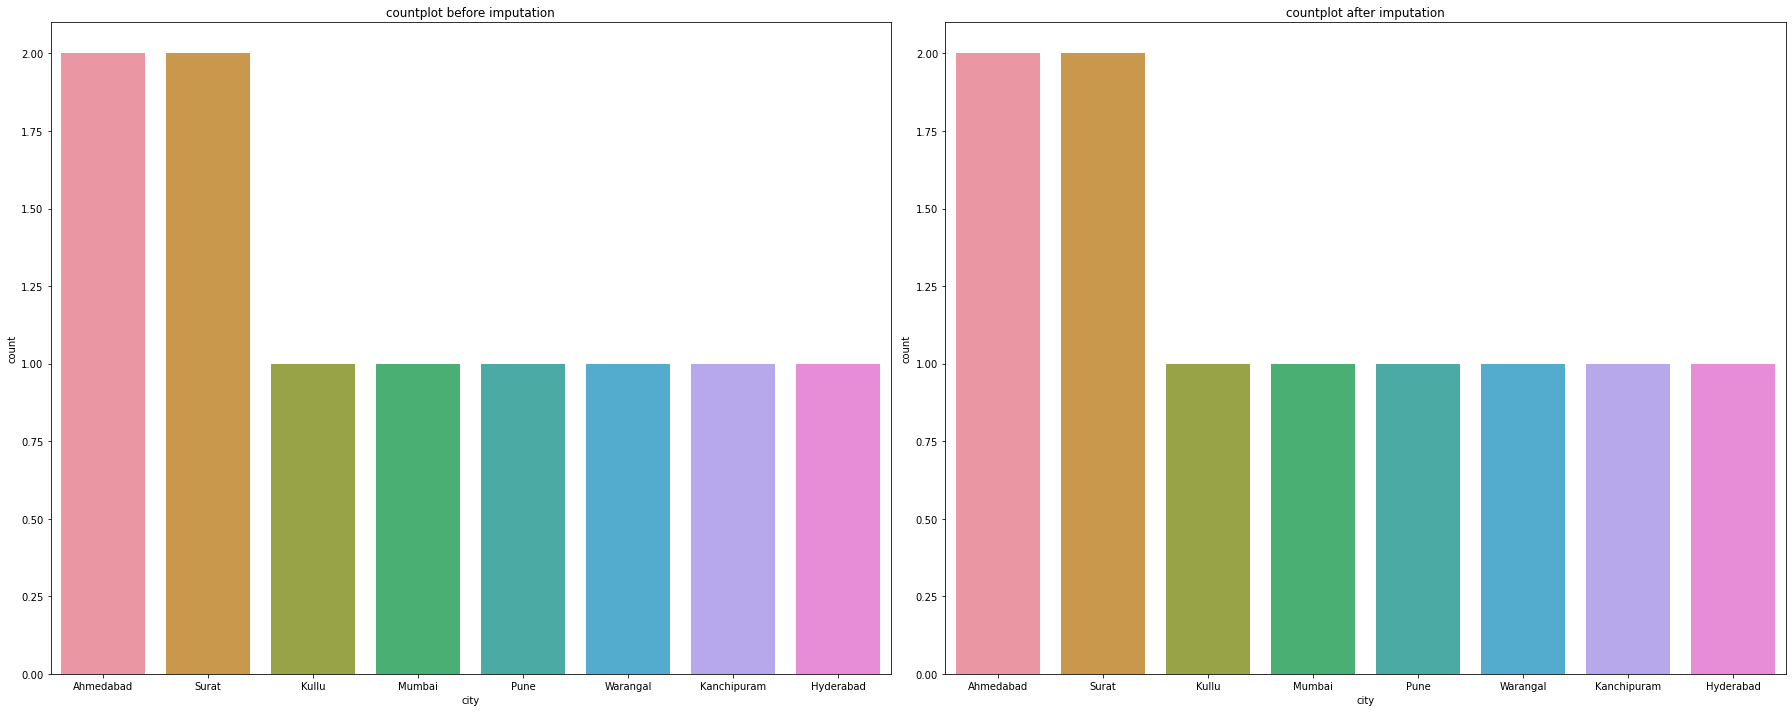

In [107]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.countplot(df['city'][0:10])
plt.title('countplot before imputation')
plt.subplot(1,2,2)
sns.countplot(full1['city'][0:10])
plt.title('countplot after imputation')
plt.tight_layout()
plt.show()

### inference :
* as we can see the distribution isn't varying after the imputation using knn classifier

## Feature Engineering

### Device columns

In [108]:
major_devices = ['xiaomi','samsung','apple','oneplus','vivo','oppo']
def device_club(x):
    if x in major_devices:
        return x
    else:
        return "other"

In [109]:
treated['devices_clubed']=treated['device'].apply(device_club)
capped['devices_clubed']=capped['device'].apply(device_club)
full1['devices_clubed']=full1['device'].apply(device_club)
full2['devices_clubed']=full2['device'].apply(device_club)

In [110]:
treated=treated.drop(columns=['device'],axis=1)
capped=capped.drop(columns=['device'],axis=1)
full1=full1.drop(columns=['device'],axis=1)
full2=full2.drop(columns=['device'],axis=1)

### City

In [111]:
temp2=pd.DataFrame(data=treated.groupby('city')['payments_initiated'].sum(),columns=['payments_initiated'])

In [112]:
(temp2)

,payments_initiated
city,
24 Paraganas North,12.0
AP,30.0
Adilabad,317.0
Administrative,12.0
Agartala,4.0
...,...
srinagar,6.0
tamilnadu,23.0
vadodara,28.0


In [113]:
temp2.sort_values(by=['payments_initiated'],ascending=False).head(20)

,payments_initiated
city,
NCR,28220.0
Bangalore,24184.0
Mumbai,18696.0
Hyderabad,17909.0
Pune,8303.0
Ahmedabad,6605.0
Surat,5342.0
Chennai,4840.0
Kolkata,4347.0


In [114]:
def tier(i):
    if i>=20000:
        return 'tier1'
    elif i>=10000 and i<20000:
        return 'tier2'
    elif i>=5000 and i<10000:
        return 'tier3'
    elif i>=1000 and i<5000:
        return 'tier4'
    elif i<1000:
        return 'tier5'

In [115]:
temp2['tier']=temp2['payments_initiated'].apply(tier)

In [116]:
temp2=temp2.reset_index()

In [117]:
dict1=dict()
for k,v in zip(temp2['city'],temp2['tier']):
    dict1[k]=v

In [118]:
dict1

{'24 Paraganas North': 'tier5',
 'AP': 'tier5',
 'Adilabad': 'tier5',
 'Administrative': 'tier5',
 'Agartala': 'tier5',
 'Agra': 'tier5',
 'Agstipura': 'tier5',
 'Ahmadnagar': 'tier5',
 'Ahmedabad': 'tier3',
 'Aizawl': 'tier5',
 'Ajmer': 'tier5',
 'Akola': 'tier5',
 'Alappuzha': 'tier5',
 'Alavalapadu': 'tier5',
 'Aligarh': 'tier5',
 'Allahabad': 'tier5',
 'Alluri': 'tier5',
 'Almora': 'tier5',
 'Alur/Karnataka': 'tier5',
 'Alwar': 'tier5',
 'Amalapuram': 'tier5',
 'Amanagara': 'tier5',
 'Ambala': 'tier5',
 'Ambala Cantt/Secunderabad': 'tier5',
 'Ambavaram AP': 'tier5',
 'Ambedkar Nagar/UP': 'tier5',
 'Ambedkar nagar': 'tier5',
 'Ambikapur': 'tier5',
 'Among 38 s of Bihar': 'tier5',
 'Amravati': 'tier5',
 'Amreli': 'tier5',
 'Amritsar': 'tier5',
 'Amroha': 'tier5',
 'Amsterdam netherlands': 'tier5',
 'Anand': 'tier5',
 'Anantapur': 'tier5',
 'Anantpur': 'tier5',
 'Angul': 'tier5',
 'Anjgir-Champa': 'tier5',
 'Annavaram': 'tier5',
 'Ariyalur': 'tier5',
 'Arrah': 'tier5',
 'Asansol': 'ti

In [119]:
treated['tier']=treated['city'].map(dict1)

In [120]:
treated

,first_payment_amount,age,city,number_of_cards,payments_initiated,payments_failed,payments_completed,payments_completed_amount_first_7days,coins_redeemed_first_7days,is_referral,visits_feature_1,visits_feature_2,given_permission_1,given_permission_2,is_churned,devices_clubed,tier
0,0,20.0,Ahmedabad,2.0,1.0,0.0,1.0,0.0,0.0,False,3.0,0.0,1,0,0,samsung,tier3
1,0,20.0,Surat,1.0,1.0,0.0,1.0,0.0,0.0,True,0.0,0.0,1,0,0,xiaomi,tier3
2,0,20.0,Kullu,1.0,2.0,1.0,1.0,0.0,0.0,True,0.0,0.0,0,1,0,xiaomi,tier5
3,0,20.0,Pune,2.0,1.0,0.0,1.0,0.0,0.0,False,0.0,1.0,1,1,0,apple,tier3
4,0,20.0,Ahmedabad,0.0,1.0,0.0,1.0,0.0,0.0,True,0.0,0.0,1,1,0,oppo,tier3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73477,55,49.0,Mumbai,1.0,1.0,0.0,1.0,55.0,0.0,True,0.0,0.0,0,1,1,oneplus,tier2
73478,60,49.0,Surat,0.0,5.0,2.0,2.0,119.0,0.0,True,0.0,0.0,1,0,1,oppo,tier3
73479,69,49.0,NCR,3.0,11.0,3.0,3.0,113.0,0.0,False,0.0,0.0,0,1,1,other,tier1
73480,74,49.0,Kolkata,3.0,3.0,0.0,1.0,74.0,0.0,False,0.0,0.0,1,1,1,samsung,tier4


In [121]:
treated.drop(columns=['city'],axis=1,inplace=True)

In [122]:
temp3=pd.DataFrame(data=capped.groupby('city')['payments_initiated'].sum(),columns=['payments_initiated'])

In [123]:
temp4=pd.DataFrame(data=full1.groupby('city')['payments_initiated'].sum(),columns=['payments_initiated'])

In [124]:
temp5=pd.DataFrame(data=full1.groupby('city')['payments_initiated'].sum(),columns=['payments_initiated'])

In [125]:
temp3.sort_values(by='payments_initiated',ascending=False).head(20)

,payments_initiated
city,
NCR,43799.0
Bangalore,36067.0
Mumbai,28201.0
Hyderabad,28155.0
Pune,11846.0
Ahmedabad,8879.0
Chennai,7108.0
Surat,6787.0
Kolkata,6033.0


In [126]:
def tier(i):
    if i>=35000:
        return 'tier1'
    elif i>=20000 and i<35000:
        return 'tier2'
    elif i>=10000 and i<20000:
        return 'tier3'
    elif i>=1000 and i<10000:
        return 'tier4'
    elif i<1000:
        return 'tier5'

In [127]:
temp3['tier']=temp3['payments_initiated'].apply(tier)

In [128]:
temp3=temp3.reset_index()

In [129]:
dict1=dict()
for k,v in zip(temp3['city'],temp3['tier']):
    dict1[k]=v

In [130]:
dict1

{'24 Paraganas North': 'tier5',
 'AP': 'tier5',
 'Adilabad': 'tier5',
 'Administrative': 'tier5',
 'Agartala': 'tier5',
 'Agra': 'tier5',
 'Agstipura': 'tier5',
 'Ahmadnagar': 'tier5',
 'Ahmedabad': 'tier4',
 'Aizawl': 'tier5',
 'Ajmer': 'tier5',
 'Akola': 'tier5',
 'Alappuzha': 'tier5',
 'Alavalapadu': 'tier5',
 'Aligarh': 'tier5',
 'Allahabad': 'tier5',
 'Alluri': 'tier5',
 'Almora': 'tier5',
 'Alur/Karnataka': 'tier5',
 'Alwar': 'tier5',
 'Amalapuram': 'tier5',
 'Amanagara': 'tier5',
 'Ambala': 'tier5',
 'Ambala Cantt/Secunderabad': 'tier5',
 'Ambavaram AP': 'tier5',
 'Ambedkar Nagar/UP': 'tier5',
 'Ambedkar nagar': 'tier5',
 'Ambikapur': 'tier5',
 'Among 38 s of Bihar': 'tier5',
 'Amravati': 'tier5',
 'Amreli': 'tier5',
 'Amritsar': 'tier5',
 'Amroha': 'tier5',
 'Amsterdam netherlands': 'tier5',
 'Anand': 'tier5',
 'Anantapur': 'tier5',
 'Anantpur': 'tier5',
 'Andheri': 'tier5',
 'Angul': 'tier5',
 'Anjgir-Champa': 'tier5',
 'Annavaram': 'tier5',
 'Ariyalur': 'tier5',
 'Arrah': 'ti

In [131]:
capped['tier']=capped['city'].map(dict1)

In [132]:
capped.drop(columns=['city'],inplace=True)

In [133]:
temp4.sort_values(by='payments_initiated',ascending=False).head(20)

,payments_initiated
city,
NCR,53198.0
Bangalore,40456.0
Mumbai,28218.0
Hyderabad,28168.0
Pune,11846.0
Ahmedabad,8879.0
Surat,8588.0
Chennai,7108.0
Kolkata,6033.0


In [134]:
def tier(i):
    if i>=40000:
        return 'tier1'
    elif i>=30000 and i<40000:
        return 'tier2'
    elif i>=10000 and i<30000:
        return 'tier3'
    elif i>=1000 and i<10000:
        return 'tier4'
    elif i<1000:
        return 'tier5'

In [135]:
temp4['tier']=temp4['payments_initiated'].apply(tier)

In [136]:
temp4=temp4.reset_index()

In [137]:
dict1=dict()
for k,v in zip(temp4['city'],temp4['tier']):
    dict1[k]=v

In [138]:
dict1

{'24 Paraganas North': 'tier5',
 'AP': 'tier5',
 'Adilabad': 'tier5',
 'Administrative': 'tier5',
 'Agartala': 'tier5',
 'Agra': 'tier5',
 'Agstipura': 'tier5',
 'Ahmadnagar': 'tier5',
 'Ahmedabad': 'tier4',
 'Aizawl': 'tier5',
 'Ajmer': 'tier5',
 'Akola': 'tier5',
 'Alappuzha': 'tier5',
 'Alavalapadu': 'tier5',
 'Aligarh': 'tier5',
 'Allahabad': 'tier5',
 'Alluri': 'tier5',
 'Almora': 'tier5',
 'Alur/Karnataka': 'tier5',
 'Alwar': 'tier5',
 'Amalapuram': 'tier5',
 'Amanagara': 'tier5',
 'Ambala': 'tier5',
 'Ambala Cantt/Secunderabad': 'tier5',
 'Ambavaram AP': 'tier5',
 'Ambedkar Nagar/UP': 'tier5',
 'Ambedkar nagar': 'tier5',
 'Ambikapur': 'tier5',
 'Among 38 s of Bihar': 'tier5',
 'Amravati': 'tier5',
 'Amreli': 'tier5',
 'Amritsar': 'tier5',
 'Amroha': 'tier5',
 'Amsterdam netherlands': 'tier5',
 'Anand': 'tier5',
 'Anantapur': 'tier5',
 'Anantpur': 'tier5',
 'Andheri': 'tier5',
 'Angul': 'tier5',
 'Anjgir-Champa': 'tier5',
 'Annavaram': 'tier5',
 'Ariyalur': 'tier5',
 'Arrah': 'ti

In [139]:
full1['tier']=full1['city'].map(dict1)

In [140]:
full1.drop(columns=['city'],inplace=True)

In [141]:
temp5.sort_values(by='payments_initiated',ascending=False).head(20)

,payments_initiated
city,
NCR,53198.0
Bangalore,40456.0
Mumbai,28218.0
Hyderabad,28168.0
Pune,11846.0
Ahmedabad,8879.0
Surat,8588.0
Chennai,7108.0
Kolkata,6033.0


In [142]:
def tier(i):
    if i>=40000:
        return 'tier1'
    elif i>=30000 and i<40000:
        return 'tier2'
    elif i>=10000 and i<30000:
        return 'tier3'
    elif i>=1000 and i<10000:
        return 'tier4'
    elif i<1000:
        return 'tier5'

In [143]:
temp5['tier']=temp5['payments_initiated'].apply(tier)

In [144]:
temp5=temp5.reset_index()

In [145]:
dict1=dict()
for k,v in zip(temp5['city'],temp5['tier']):
    dict1[k]=v

In [146]:
dict1

{'24 Paraganas North': 'tier5',
 'AP': 'tier5',
 'Adilabad': 'tier5',
 'Administrative': 'tier5',
 'Agartala': 'tier5',
 'Agra': 'tier5',
 'Agstipura': 'tier5',
 'Ahmadnagar': 'tier5',
 'Ahmedabad': 'tier4',
 'Aizawl': 'tier5',
 'Ajmer': 'tier5',
 'Akola': 'tier5',
 'Alappuzha': 'tier5',
 'Alavalapadu': 'tier5',
 'Aligarh': 'tier5',
 'Allahabad': 'tier5',
 'Alluri': 'tier5',
 'Almora': 'tier5',
 'Alur/Karnataka': 'tier5',
 'Alwar': 'tier5',
 'Amalapuram': 'tier5',
 'Amanagara': 'tier5',
 'Ambala': 'tier5',
 'Ambala Cantt/Secunderabad': 'tier5',
 'Ambavaram AP': 'tier5',
 'Ambedkar Nagar/UP': 'tier5',
 'Ambedkar nagar': 'tier5',
 'Ambikapur': 'tier5',
 'Among 38 s of Bihar': 'tier5',
 'Amravati': 'tier5',
 'Amreli': 'tier5',
 'Amritsar': 'tier5',
 'Amroha': 'tier5',
 'Amsterdam netherlands': 'tier5',
 'Anand': 'tier5',
 'Anantapur': 'tier5',
 'Anantpur': 'tier5',
 'Andheri': 'tier5',
 'Angul': 'tier5',
 'Anjgir-Champa': 'tier5',
 'Annavaram': 'tier5',
 'Ariyalur': 'tier5',
 'Arrah': 'ti

In [147]:
full2['tier']=full2['city'].map(dict1)

In [148]:
full2.drop(columns=['city'],inplace=True)

### our final datas shapes

In [149]:
print(treated.shape)
print(capped.shape)
print(full1.shape)
print(full2.shape)

(73482, 16)
(95574, 16)
(101239, 16)
(95574, 16)


### Chi2 contengeny test

* H0: both the variables are independent. i.e, no relation exists between both the variable.
* H1: both the variables are not independent. i.e, relation exits between both the variable.

In [150]:
dependent =[]
independent=[]
for i in full2.select_dtypes(exclude=np.number).columns:
    if i!= 'is_churned':
        print('------------------------------------------------------------------------------------------------------------')
        print()
        print('chi2 contegency test between {} and {} variables'.format(i,'is_churned'))
        print()
        count=pd.crosstab(full2[i],full2['is_churned'])
        chi2,p,ddof,exp=chi2_contingency(count,correction=False)
        if p>=0.05 :
            print('the pvalue is {} , and since the pvalue is greater than 0.05 we fail to reject the null hypothesis'.format(p))
            print('the {} and is_churned variable are independent variable'.format(i))
            print()
            independent.append(i)
        else:
            print('the pvalue is {} , and since the pvalue is less than 0.05 we reject the null hypothesis'.format(p))
            print('the {} and is_churned variable are dependent variable'.format(i))
            print()
            dependent.append(i)
print('the variables which are independent with target variables are ',independent)
print('the variables which are not independent with target variables are ',dependent)


------------------------------------------------------------------------------------------------------------

chi2 contegency test between is_referral and is_churned variables

the pvalue is 0.0 , and since the pvalue is less than 0.05 we reject the null hypothesis
the is_referral and is_churned variable are dependent variable

------------------------------------------------------------------------------------------------------------

chi2 contegency test between given_permission_1 and is_churned variables

the pvalue is 6.576073721378768e-104 , and since the pvalue is less than 0.05 we reject the null hypothesis
the given_permission_1 and is_churned variable are dependent variable

------------------------------------------------------------------------------------------------------------

chi2 contegency test between given_permission_2 and is_churned variables

the pvalue is 8.506470728354922e-233 , and since the pvalue is less than 0.05 we reject the null hypothesis
the given_permi

## Encoding

### treated data

In [151]:
treated.dtypes

first_payment_amount                       int64
age                                      float64
number_of_cards                          float64
payments_initiated                       float64
payments_failed                          float64
payments_completed                       float64
payments_completed_amount_first_7days    float64
coins_redeemed_first_7days               float64
is_referral                               object
visits_feature_1                         float64
visits_feature_2                         float64
given_permission_1                        object
given_permission_2                        object
is_churned                                object
devices_clubed                            object
tier                                      object
dtype: object

In [152]:
dict1={False:0,True:1}
treated['is_referral']=treated['is_referral'].map(dict1)
capped['is_referral']=capped['is_referral'].map(dict1)
full1['is_referral']=full1['is_referral'].map(dict1)
full2['is_referral']=full2['is_referral'].map(dict1)

In [153]:
treated['given_permission_1']=treated['given_permission_1'].astype('int')
capped['given_permission_1']=capped['given_permission_1'].astype('int')
full1['given_permission_1']=full1['given_permission_1'].astype('int')
full2['given_permission_1']=full2['given_permission_1'].astype('int')


In [154]:
treated['given_permission_2']=treated['given_permission_2'].astype('int')
capped['given_permission_2']=capped['given_permission_2'].astype('int')
full1['given_permission_2']=full1['given_permission_2'].astype('int')
full2['given_permission_2']=full2['given_permission_2'].astype('int')

In [155]:
treated['is_churned']=treated['is_churned'].astype('int')
capped['is_churned']=capped['is_churned'].astype('int')
full1['is_churned']=full1['is_churned'].astype('int')
full2['is_churned']=full2['is_churned'].astype('int')

In [156]:
treated_df=pd.get_dummies(data=treated,columns=['devices_clubed','tier'])
capped_df=pd.get_dummies(data=capped,columns=['devices_clubed','tier'])
full1_df=pd.get_dummies(data=full1,columns=['devices_clubed','tier'])
full2_df=pd.get_dummies(data=full2,columns=['devices_clubed','tier'])

## Scalling

## Treated data standard scalling , Robust scalling and power transform

In [157]:
treated_num=treated_df[['first_payment_amount', 'age','payments_completed_amount_first_7days', 'coins_redeemed_first_7days']]
treated_cat=treated_df.drop(columns=['first_payment_amount', 'age','payments_completed_amount_first_7days', 'coins_redeemed_first_7days'])

In [158]:
treated_num_full=treated_df[['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed','payments_completed','payments_completed_amount_first_7days', 'coins_redeemed_first_7days','visits_feature_1', 'visits_feature_2']]
treated_num_full_cat=treated_df.drop(columns=['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed','payments_completed','payments_completed_amount_first_7days', 'coins_redeemed_first_7days','visits_feature_1', 'visits_feature_2'])

In [159]:
pt=PowerTransformer()
sc=StandardScaler()
rb=RobustScaler()
treated_trans=pd.DataFrame(data=pt.fit_transform(treated_num),columns=treated_num.columns)
treated_trans_full=pd.DataFrame(data=pt.fit_transform(treated_num_full),columns=treated_num_full.columns)
treated_scaled=pd.DataFrame(data=sc.fit_transform(treated_num),columns=treated_num.columns)
treated_scaled_full=pd.DataFrame(data=sc.fit_transform(treated_num_full),columns=treated_num_full.columns)
treated_robust=pd.DataFrame(data=rb.fit_transform(treated_num),columns=treated_num.columns)
treated_robust_full=pd.DataFrame(data=rb.fit_transform(treated_num_full),columns=treated_num_full.columns)

In [160]:
treated_trans_ready=pd.concat([treated_trans,treated_cat],axis=1)
treated_trans_full_ready=pd.concat([treated_trans_full,treated_num_full_cat],axis=1)
treated_scaled_ready=pd.concat([treated_scaled,treated_cat],axis=1)
treated_scaled_full_ready=pd.concat([treated_scaled_full,treated_num_full_cat],axis=1)
treated_robust_ready=pd.concat([treated_robust,treated_cat],axis=1)
treated_robust_full_ready=pd.concat([treated_robust_full,treated_num_full_cat],axis=1)

In [161]:
print(treated_trans_ready.shape)
print(treated_trans_ready.shape)
print(treated_trans_full_ready.shape)
print(treated_scaled_ready.shape)
print(treated_scaled_full_ready.shape)
print(treated_robust_ready.shape)
print(treated_robust_full_ready.shape)

(73482, 26)
(73482, 26)
(73482, 26)
(73482, 26)
(73482, 26)
(73482, 26)
(73482, 26)


## capped data standard scalling , Robust scalling and power transform

In [162]:
capped_num=capped_df[['first_payment_amount', 'age','payments_completed_amount_first_7days', 'coins_redeemed_first_7days']]
capped_cat=capped_df.drop(columns=['first_payment_amount', 'age','payments_completed_amount_first_7days', 'coins_redeemed_first_7days'])

In [163]:
capped_num_full=capped_df[['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed','payments_completed','payments_completed_amount_first_7days', 'coins_redeemed_first_7days','visits_feature_1', 'visits_feature_2']]
capped_num_full_cat=capped_df.drop(columns=['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed','payments_completed','payments_completed_amount_first_7days', 'coins_redeemed_first_7days','visits_feature_1', 'visits_feature_2'])

In [164]:
pt=PowerTransformer()
sc=StandardScaler()
rb=RobustScaler()
capped_trans=pd.DataFrame(data=pt.fit_transform(capped_num),columns=capped_num.columns)
capped_trans_full=pd.DataFrame(data=pt.fit_transform(capped_num_full),columns=capped_num_full.columns)
capped_scaled=pd.DataFrame(data=sc.fit_transform(capped_num),columns=capped_num.columns)
capped_scaled_full=pd.DataFrame(data=sc.fit_transform(capped_num_full),columns=capped_num_full.columns)
capped_robust=pd.DataFrame(data=rb.fit_transform(capped_num),columns=capped_num.columns)
capped_robust_full=pd.DataFrame(data=rb.fit_transform(capped_num_full),columns=capped_num_full.columns)

In [165]:
capped_trans_ready=pd.concat([capped_trans,capped_cat],axis=1)
capped_trans_full_ready=pd.concat([capped_trans_full,capped_num_full_cat],axis=1)
capped_scaled_ready=pd.concat([capped_scaled,capped_cat],axis=1)
capped_scaled_full_ready=pd.concat([capped_scaled_full,capped_num_full_cat],axis=1)
capped_robust_ready=pd.concat([capped_robust,capped_cat],axis=1)
capped_robust_full_ready=pd.concat([capped_robust_full,capped_num_full_cat],axis=1)

In [166]:
print(capped_trans_ready.shape)
print(capped_trans_ready.shape)
print(capped_trans_full_ready.shape)
print(capped_scaled_ready.shape)
print(capped_scaled_full_ready.shape)
print(capped_robust_ready.shape)
print(capped_robust_full_ready.shape)

(95574, 26)
(95574, 26)
(95574, 26)
(95574, 26)
(95574, 26)
(95574, 26)
(95574, 26)


### full data with null values droped and city column null values imputed with Knn classifier standard scalling , Robust scalling and power transform

In [167]:
full1_num=full1_df[['first_payment_amount', 'age','payments_completed_amount_first_7days', 'coins_redeemed_first_7days']]
full1_cat=full1_df.drop(columns=['first_payment_amount', 'age','payments_completed_amount_first_7days', 'coins_redeemed_first_7days'])

In [168]:
full1_num_full=full1_df[['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed','payments_completed','payments_completed_amount_first_7days', 'coins_redeemed_first_7days','visits_feature_1', 'visits_feature_2']]
full1_num_full_cat=full1_df.drop(columns=['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed','payments_completed','payments_completed_amount_first_7days', 'coins_redeemed_first_7days','visits_feature_1', 'visits_feature_2'])

In [169]:
pt=PowerTransformer()
sc=StandardScaler()
rb=RobustScaler()
full1_trans=pd.DataFrame(data=pt.fit_transform(full1_num),columns=full1_num.columns)
full1_trans_full=pd.DataFrame(data=pt.fit_transform(full1_num_full),columns=full1_num_full.columns)
full1_scaled=pd.DataFrame(data=sc.fit_transform(full1_num),columns=full1_num.columns)
full1_scaled_full=pd.DataFrame(data=sc.fit_transform(full1_num_full),columns=full1_num_full.columns)
full1_robust=pd.DataFrame(data=rb.fit_transform(full1_num),columns=full1_num.columns)
full1_robust_full=pd.DataFrame(data=rb.fit_transform(full1_num_full),columns=full1_num_full.columns)

In [170]:
full1_trans_ready=pd.concat([full1_trans,full1_cat],axis=1)
full1_trans_full_ready=pd.concat([full1_trans_full,full1_num_full_cat],axis=1)
full1_scaled_ready=pd.concat([full1_scaled,full1_cat],axis=1)
full1_scaled_full_ready=pd.concat([full1_scaled_full,full1_num_full_cat],axis=1)
full1_robust_ready=pd.concat([full1_robust,full1_cat],axis=1)
full1_robust_full_ready=pd.concat([full1_robust_full,full1_num_full_cat],axis=1)

In [171]:
print(full1_trans_ready.shape)
print(full1_trans_ready.shape)
print(full1_trans_full_ready.shape)
print(full1_scaled_ready.shape)
print(full1_scaled_full_ready.shape)
print(full1_robust_ready.shape)
print(full1_robust_full_ready.shape)

(101239, 25)
(101239, 25)
(101239, 25)
(101239, 25)
(101239, 25)
(101239, 25)
(101239, 25)


### full data with null values droped standard scalling , Robust scalling and power transform

In [172]:
full2_num=full2_df[['first_payment_amount', 'age','payments_completed_amount_first_7days', 'coins_redeemed_first_7days']]
full2_cat=full2_df.drop(columns=['first_payment_amount', 'age','payments_completed_amount_first_7days', 'coins_redeemed_first_7days'])

In [173]:
full2_num_full=full2_df[['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed','payments_completed','payments_completed_amount_first_7days', 'coins_redeemed_first_7days','visits_feature_1', 'visits_feature_2']]
full2_num_full_cat=full2_df.drop(columns=['first_payment_amount', 'age', 'number_of_cards', 'payments_initiated',
       'payments_failed','payments_completed','payments_completed_amount_first_7days', 'coins_redeemed_first_7days','visits_feature_1', 'visits_feature_2'])

In [174]:
pt=PowerTransformer()
sc=StandardScaler()
rb=RobustScaler()
full2_trans=pd.DataFrame(data=pt.fit_transform(full2_num),columns=full2_num.columns)
full2_trans_full=pd.DataFrame(data=pt.fit_transform(full2_num_full),columns=full2_num_full.columns)
full2_scaled=pd.DataFrame(data=sc.fit_transform(full2_num),columns=full2_num.columns)
full2_scaled_full=pd.DataFrame(data=sc.fit_transform(full2_num_full),columns=full2_num_full.columns)
full2_robust=pd.DataFrame(data=rb.fit_transform(full2_num),columns=full2_num.columns)
full2_robust_full=pd.DataFrame(data=rb.fit_transform(full2_num_full),columns=full2_num_full.columns)

In [175]:
full2_trans_ready=pd.concat([full2_trans,full2_cat],axis=1)
full2_trans_full_ready=pd.concat([full2_trans_full,full2_num_full_cat],axis=1)
full2_scaled_ready=pd.concat([full2_scaled,full2_cat],axis=1)
full2_scaled_full_ready=pd.concat([full2_scaled_full,full2_num_full_cat],axis=1)
full2_robust_ready=pd.concat([full2_robust,full2_cat],axis=1)
full2_robust_full_ready=pd.concat([full2_robust_full,full2_num_full_cat],axis=1)

In [176]:
print(full2_trans_ready.shape)
print(full2_trans_ready.shape)
print(full2_trans_full_ready.shape)
print(full2_scaled_ready.shape)
print(full2_scaled_full_ready.shape)
print(full2_robust_ready.shape)
print(full2_robust_full_ready.shape)

(95574, 25)
(95574, 25)
(95574, 25)
(95574, 25)
(95574, 25)
(95574, 25)
(95574, 25)


## Models

In [424]:
d1={'treated- outliers removed  continuous variable power transformed':treated_trans_ready,
    'treated- outliers removed continuous and discrete variable power transformed':treated_trans_full_ready,
    'treated- outliers removed  continuous variable standard scalled':treated_scaled_ready,
    'treated- outliers removed continuous and discrete variable standard scalled ':treated_scaled_full_ready,
    'treated- outliers removed  continuous variable robust scalled':treated_robust_ready,
    'treated- outliers removed  continuous variable and discrete variable Robust scalled':treated_robust_full_ready,
    
    'capped- outliers capped  continuous variable power transformed':capped_trans_ready,
    'capped- outliers capped continuous and discrete variable power transformed':capped_trans_full_ready,
    'capped- outliers capped  continuous variable standard scalled':capped_scaled_ready,
    'capped- outliers capped continuous and discrete variable standard scalled ':capped_scaled_full_ready,
    'capped- outliers capped  continuous variable robust scalled':capped_robust_ready,
    'capped- outliers capped  continuous variable and discrete variable Robust scalled':capped_robust_full_ready,
    
    'full1- outliers kept missing values droped except city column continuous variable power transformed':full1_trans_ready,
    'full1- outliers kept missing values droped except city column continuous and discrete variable power transformed':full1_trans_full_ready,
    'full1- outliers kept missing values droped except city column  continuous variable standard scalled':full1_scaled_ready,
    'full1- outliers kept missing values droped except city column continuous and discrete variable standard scalled ':full1_scaled_full_ready,
    'full1- outliers kept missing values droped except city column  continuous variable robust scalled':full1_robust_ready,
    'full1- outliers kept missing values droped except city column  continuous variable and discrete variable Robust scalled':full1_robust_full_ready,
    
    'full2- outliers kept missing values droped in all columns continuous variable power transformed':full2_trans_ready,
    'full2- outliers kept missing values droped in all columns continuous and discrete variable power transformed':full2_trans_full_ready,
    'full2- outliers kept missing values droped in all columns  continuous variable standard scalled':full2_scaled_ready,
    'full2- outliers kept missing values droped in all columns continuous and discrete variable standard scalled ':full2_scaled_full_ready,
    'full2- outliers kept missing values droped in all columns  continuous variable robust scalled':full2_robust_ready,
    'full2- outliers kept missing values droped in all columns  continuous variable and discrete variable Robust scalled':full2_robust_full_ready
   }

### train test split

In [425]:
for desc , data in list(zip(d1.keys(),d1.values())):
    print('---------------------------------------------------------------------------------------------------------------')
    print()
    print(desc)
    print()
    clf = {
    'logistic regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'XGBoost':XGBClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'NaiveBayes':GaussianNB()
    }
    x=data.drop(columns=['is_churned'])
    y=data['is_churned']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
    
    model_score = pd.DataFrame(columns=['model name','precission score','recall score','acurracy score','f1 score'])

    for clf_name,clf in list(zip(clf.keys(),clf.values())):
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        t={
            'model name':clf_name,
            'precission score': precision_score(y_test,y_pred),
            'recall score':recall_score(y_test,y_pred),
            'acurracy score':accuracy_score(y_test,y_pred),
            'f1 score':f1_score(y_test,y_pred),
            'roc_auc_score':roc_auc_score(y_test,y_pred)
        }
        model_score=model_score.append(t,ignore_index=True)
    model_score=model_score.sort_values(by='recall score',ascending=False)
    print(model_score)

---------------------------------------------------------------------------------------------------------------

treated- outliers removed  continuous variable power transformed

            model name  precission score  recall score  acurracy score  \
6           NaiveBayes          0.474920      0.627504        0.678884   
3         DecisionTree          0.431556      0.451122        0.655750   
5             AdaBoost          0.679881      0.413315        0.764709   
0  logistic regression          0.685308      0.406085        0.764981   
1                  KNN          0.574118      0.404278        0.730279   
4              XGBoost          0.685329      0.398253        0.763711   
2         RandomForest          0.652696      0.368278        0.750737   

   f1 score  roc_auc_score  
6  0.540653       0.664265  
3  0.441122       0.597527  
5  0.514098       0.664726  
0  0.509978       0.662863  
1  0.474456       0.637521  
4  0.503763       0.659726  
2  0.470871       0.64191

            model name  precission score  recall score  acurracy score  \
6           NaiveBayes          0.370781      0.717528        0.582708   
3         DecisionTree          0.414886      0.443079        0.671259   
5             AdaBoost          0.681345      0.386033        0.778991   
4              XGBoost          0.690796      0.374498        0.779374   
1                  KNN          0.509684      0.356319        0.725596   
2         RandomForest          0.652164      0.351429        0.767447   
0  logistic regression          0.704282      0.197969        0.753775   

   f1 score  roc_auc_score  
6  0.488915       0.624140  
3  0.428519       0.601136  
5  0.492837       0.658229  
4  0.485691       0.654950  
1  0.419421       0.612111  
2  0.456738       0.639598  
0  0.309062       0.582968  
---------------------------------------------------------------------------------------------------------------

capped- outliers capped continuous and discrete variable stand

            model name  precission score  recall score  acurracy score  \
6           NaiveBayes          0.351914      0.783169        0.524858   
3         DecisionTree          0.421121      0.447459        0.665613   
5             AdaBoost          0.700100      0.404461        0.779830   
4              XGBoost          0.712495      0.392044        0.780587   
1                  KNN          0.538818      0.374224        0.729060   
2         RandomForest          0.668726      0.360888        0.765771   
0  logistic regression          0.698227      0.199241        0.746016   

   f1 score  roc_auc_score  
6  0.485618       0.602182  
3  0.433891       0.600310  
5  0.512716       0.667465  
4  0.505785       0.664279  
1  0.441685       0.622841  
2  0.468787       0.644571  
0  0.310018       0.582342  
---------------------------------------------------------------------------------------------------------------

full1- outliers kept missing values droped except city column 

### Cross validation

In [430]:
kf=KFold(n_splits=10,shuffle=True,random_state=10)
for desc , data in list(zip(d1.keys(),d1.values())):
    print('---------------------------------------------------------------------------------------------------------------')
    print()
    print(desc)
    print()
    clf = {
    'logistic regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'XGBoost':XGBClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'NaiveBayes':GaussianNB()
    }
    x=data.drop(columns=['is_churned'])
    y=data['is_churned']
    
    model_scores = pd.DataFrame(columns=['model name','mean recall score','recall variance','mean accuracy','accuracy variance','mean roc_auc','roc_auc_variance'])

    for clf_name,clf in list(zip(clf.keys(),clf.values())):
        cv=cross_val_score(estimator=clf,X=x,y=y,cv=kf,scoring='recall')
        cv_auc=cross_val_score(estimator=clf,X=x,y=y,cv=kf,scoring='roc_auc')
        cv_accuracy=cross_val_score(estimator=clf,X=x,y=y,cv=kf,scoring='accuracy')
        t={
            'model name':clf_name,
            'mean recall score':np.mean(cv ),
            'recall variance':np.std(cv,ddof=1),
            'mean accuracy':np.mean(cv_accuracy),
            'accuracy variance':np.std(cv_accuracy,ddof=1),
            'mean roc_auc':np.mean(cv_auc),
            'roc_auc_variance':np.std(cv_auc,ddof=1)
        }
        model_scores=model_scores.append(t,ignore_index=True)
    model_scores=model_scores.sort_values(by='mean recall score',ascending=False)
    print(model_scores)

---------------------------------------------------------------------------------------------------------------

treated- outliers removed  continuous variable power transformed

            model name  mean recall score  recall variance  mean accuracy  \
6           NaiveBayes           0.606950         0.013406       0.688713   
3         DecisionTree           0.448954         0.007472       0.654677   
5             AdaBoost           0.411245         0.008035       0.766174   
1                  KNN           0.404313         0.008565       0.728940   
0  logistic regression           0.399078         0.008444       0.763983   
4              XGBoost           0.396875         0.008168       0.766351   
2         RandomForest           0.367210         0.006168       0.750973   

   accuracy variance  mean roc_auc  roc_auc_variance  
6           0.005352      0.719137          0.006926  
3           0.004918      0.601458          0.005229  
5           0.002786      0.746773     

            model name  mean recall score  recall variance  mean accuracy  \
6           NaiveBayes           0.568973         0.010506       0.712401   
3         DecisionTree           0.432094         0.012048       0.668843   
5             AdaBoost           0.378605         0.010958       0.780045   
1                  KNN           0.365242         0.008087       0.746270   
4              XGBoost           0.364378         0.007451       0.781028   
0  logistic regression           0.361179         0.011528       0.778046   
2         RandomForest           0.339878         0.008709       0.767949   

   accuracy variance  mean roc_auc  roc_auc_variance  
6           0.003901      0.730827          0.005205  
3           0.003594      0.600985          0.006038  
5           0.003593      0.747699          0.005612  
1           0.003757      0.679358          0.006667  
4           0.003400      0.744546          0.004620  
0           0.004041      0.742622          0.004984 

            model name  mean recall score  recall variance  mean accuracy  \
6           NaiveBayes           0.776227         0.018657       0.531485   
3         DecisionTree           0.450715         0.006938       0.672853   
5             AdaBoost           0.400765         0.010431       0.779996   
4              XGBoost           0.387178         0.009976       0.781211   
2         RandomForest           0.358968         0.008526       0.766700   
1                  KNN           0.351318         0.007810       0.722943   
0  logistic regression           0.204899         0.005826       0.748950   

   accuracy variance  mean roc_auc  roc_auc_variance  
6           0.008098      0.674872          0.006727  
3           0.004168      0.609904          0.004408  
5           0.004536      0.753172          0.005172  
4           0.003510      0.753680          0.005409  
2           0.004540      0.722153          0.004557  
1           0.002942      0.660078          0.002801 

            model name  mean recall score  recall variance  mean accuracy  \
6           NaiveBayes           0.770040         0.009993       0.529569   
3         DecisionTree           0.432794         0.009439       0.669272   
5             AdaBoost           0.378861         0.011719       0.780034   
4              XGBoost           0.365262         0.008229       0.780809   
2         RandomForest           0.340204         0.009000       0.767698   
1                  KNN           0.328429         0.008613       0.722152   
0  logistic regression           0.174800         0.005425       0.751543   

   accuracy variance  mean roc_auc  roc_auc_variance  
6           0.004657      0.669850          0.005882  
3           0.002208      0.600347          0.003627  
5           0.004014      0.747551          0.005506  
4           0.003147      0.746329          0.005820  
2           0.003250      0.715374          0.005432  
1           0.003893      0.646109          0.004827 

In [441]:
((1-77.6227)-(1-77.0040))/(1-77.6227)

0.00807463062512793

In [440]:
(0.018657-0.009993)/0.018657

0.46438334137321113

# Final model 

### logit model

In [291]:
x=full1_scaled_full_ready.drop('is_churned',axis=1)
y=full1_scaled_full_ready['is_churned']

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [251]:
x_c=sm.add_constant(x)
model=sm.Logit(y,x_c)
result=model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.544196
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.088      
Dependent Variable:     is_churned           AIC:                  110233.8112
Date:                   2023-02-03 18:17     BIC:                  110452.8917
No. Observations:       101239               Log-Likelihood:       -55094.    
Df Model:               22                   LL-Null:              -60440.    
Df Residuals:           101216               LLR p-value:          0.0000     
Converged:              0.0000               Scale:                1.0000     
------------------------------------------------------------------------------
                                       Coef.  Std.Err.  z  P>|z| [0.025 0.975]
------------------------------------------------------------------------------
const                        

## model

In [292]:
clf = {
    'logistic regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'XGBoost':XGBClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'NaiveBayes':GaussianNB(),
    'BaggingClassifier':BaggingClassifier()
}

kf=KFold(n_splits=10,shuffle=True,random_state=0)
final_model_scores = pd.DataFrame(columns=['model name','recall scores','recall score','variance','roc_auc scores','roc_auc','roc_auc_variance'])

for clf_name,clf in list(zip(clf.keys(),clf.values())):
    print('fitting model .....',clf_name)
    cv=cross_val_score(estimator=clf,X=x,y=y,cv=kf,scoring='recall')
    cv_auc=cross_val_score(estimator=clf,X=x,y=y,cv=kf,scoring='roc_auc')
    t={
        'model name':clf_name,
        'recall scores':cv,
        'recall score':np.mean(cv ),
        'variance':np.std(cv,ddof=1),
        'roc_auc scores':cv_auc,
        'roc_auc':np.mean(cv_auc),
        'roc_auc_variance':np.std(cv_auc,ddof=1)
    }
    final_model_scores = final_model_scores.append(t,ignore_index=True)
final_model_scores=final_model_scores.sort_values(by='recall score',ascending=False)
final_model_scores
    
    

fitting model ..... logistic regression
fitting model ..... KNN
fitting model ..... RandomForest
fitting model ..... DecisionTree
fitting model ..... XGBoost
fitting model ..... AdaBoost
fitting model ..... GradientBoost
fitting model ..... NaiveBayes
fitting model ..... BaggingClassifier


,model name,recall scores,recall score,variance,roc_auc scores,roc_auc,roc_auc_variance
7,NaiveBayes,"[0.7784030953218432, 0.7970467032967034, 0.778...",0.776965,0.014302,"[0.6769482706738004, 0.6726235949470663, 0.680...",0.674836,0.007132
3,DecisionTree,"[0.46253957087583536, 0.43475274725274726, 0.4...",0.451206,0.010082,"[0.6182586394328895, 0.6041758803627044, 0.610...",0.610758,0.005488
5,AdaBoost,"[0.3995779106577559, 0.3907967032967033, 0.419...",0.400533,0.009585,"[0.7529931207823736, 0.7481063116722434, 0.762...",0.753417,0.004358
6,GradientBoost,"[0.39289482940555753, 0.38255494505494503, 0.4...",0.391546,0.008319,"[0.7575341609418759, 0.7526897564270172, 0.766...",0.758584,0.004097
4,XGBoost,"[0.3872669715089694, 0.37225274725274726, 0.39...",0.386999,0.010397,"[0.7536938976901464, 0.7489883504598563, 0.758...",0.753370,0.003916
8,BaggingClassifier,"[0.3587759409074921, 0.35302197802197804, 0.36...",0.361490,0.008509,"[0.6867197268699539, 0.690965825806196, 0.6996...",0.692419,0.004937
2,RandomForest,"[0.36334857544846993, 0.3492445054945055, 0.37...",0.360505,0.010836,"[0.7235403214597881, 0.7161215015572336, 0.731...",0.723197,0.005994
1,KNN,"[0.35490678860358776, 0.33550824175824173, 0.3...",0.349248,0.007928,"[0.6605432021040891, 0.6533017363079239, 0.661...",0.655824,0.003959
0,logistic regression,"[0.2173760112557158, 0.2084478021978022, 0.212...",0.205369,0.009214,"[0.7043689570612548, 0.7062985349889989, 0.710...",0.704450,0.005242


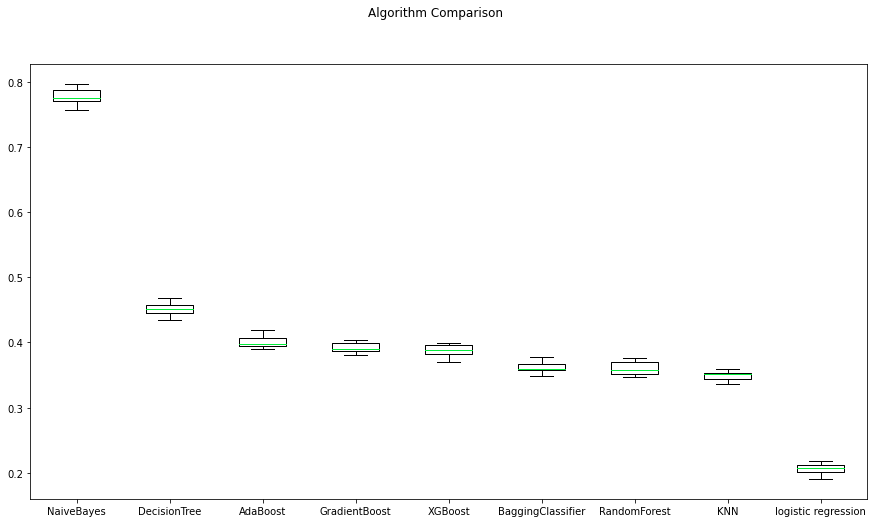

In [293]:
plt.rcParams['figure.figsize'] = [15,8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(final_model_scores['recall scores'])
ax.set_xticklabels(final_model_scores['model name'])
plt.show()

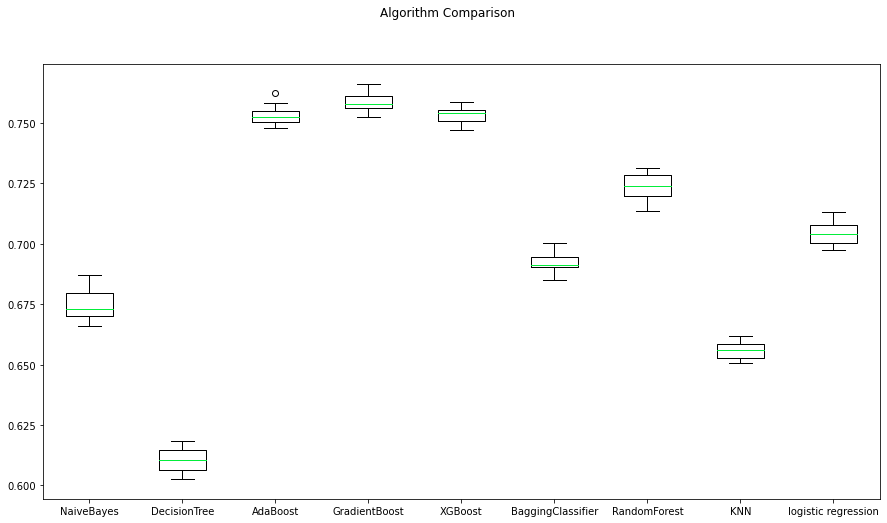

In [294]:
plt.rcParams['figure.figsize'] = [15,8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(final_model_scores['roc_auc scores'])
ax.set_xticklabels(final_model_scores['model name'])
plt.show()

## Hyper Parameter Tuning

In [201]:
gb=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
kf=KFold(n_splits=10,random_state=10,shuffle=True)
gs_NB = GridSearchCV(estimator=gb, param_grid=params_NB, cv=kf,verbose=1,scoring='recall')
gs_NB.fit(x,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall', verbose=1)

In [202]:
gs_NB.best_params_

{'var_smoothing': 0.23101297000831597}

In [205]:
tuned_NB=GaussianNB(var_smoothing=0.23101297000831597)
tuned_recall=cross_val_score(estimator=tuned_NB,X=x,y=y,cv=kf,scoring='recall')
tuned_auc=cross_val_score(estimator=tuned_NB,X=x,y=y,cv=kf,scoring='roc_auc')

In [240]:
np.mean(tuned_recall)

0.8337674768552974

In [257]:
np.mean(tuned_auc)

0.684723183689875

In [272]:
print('recall Bais error : ',1-np.mean(tuned_recall),', recall variance error : ',np.std(tuned_recall,ddof=1))

print('auc Bais error : ',1-np.mean(tuned_auc),', auc variance error : ',np.std(tuned_auc,ddof=1))

recall Bais error :  0.1662325231447026 , recall variance error :  0.017942794274311898
auc Bais error :  0.31527681631012505 , auc variance error :  0.007951202620314967


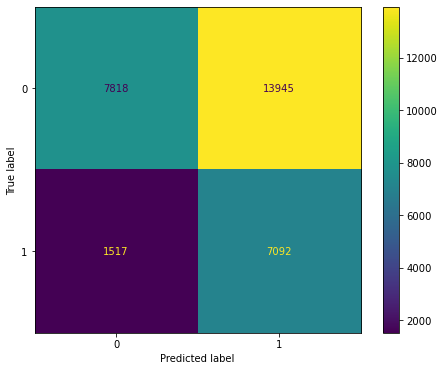

In [253]:
tuned_NB=GaussianNB(var_smoothing=0.23101297000831597)
tuned_NB.fit(x_train,y_train)
y_pred=tuned_NB.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [254]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.36      0.50     21763
           1       0.34      0.82      0.48      8609

    accuracy                           0.49     30372
   macro avg       0.59      0.59      0.49     30372
weighted avg       0.70      0.49      0.50     30372



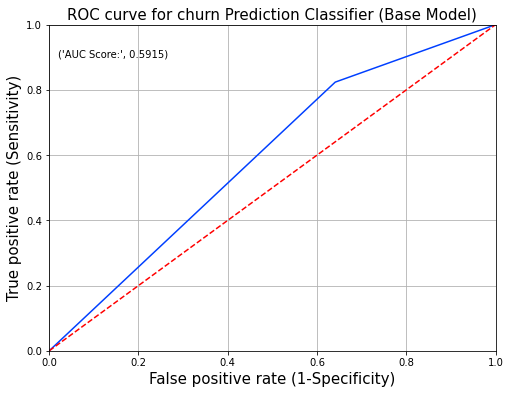

In [255]:
tpr,fpr,threshold=roc_curve(y_test,y_pred)
# plot the ROC curve
plt.plot(tpr, fpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for churn Prediction Classifier (Base Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

# Bagging

In [214]:
tuned_NB=GaussianNB(var_smoothing=0.23101297000831597)

bagged_tuned_NB=BaggingClassifier(base_estimator=tuned_NB,random_state=10)

kf=KFold(n_splits=10,random_state=10,shuffle=True)

params_NB = {'n_estimators': np.arange(10,200,10)}

gs_bagging = GridSearchCV(estimator=bagged_tuned_NB, param_grid=params_NB, cv=kf,verbose=1,scoring='recall')
gs_bagging.fit(x,y)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=BaggingClassifier(base_estimator=GaussianNB(var_smoothing=0.23101297000831597),
                                         random_state=10),
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             scoring='recall', verbose=1)

In [215]:
gs_bagging.best_params_

{'n_estimators': 120}

In [216]:
bagged_tuned_NB=BaggingClassifier(base_estimator=tuned_NB,random_state=10,n_estimators=120)

bagged_tuned_recall=cross_val_score(estimator=bagged_tuned_NB,X=x,y=y,cv=kf,scoring='recall')

In [218]:
bagged_tuned_auc=cross_val_score(estimator=bagged_tuned_NB,X=x,y=y,cv=kf,scoring='roc_auc')

In [243]:
np.mean(bagged_tuned_recall)

0.8354496839520784

In [259]:
np.mean(bagged_tuned_auc)

0.6850658390985483

In [271]:
print('recall bais error : ',1-np.mean(bagged_tuned_recall),', recall variance error : ',np.std(bagged_tuned_recall,ddof=1))
print('auc bais error : ',1-np.mean(bagged_tuned_auc),', auc variance error : ',np.std(bagged_tuned_auc,ddof=1))

recall bais error :  0.16455031604792159 , recall variance error :  0.01883208997948836
auc bais error :  0.31493416090145165 , auc variance error :  0.007973105929288323


## Boosting

In [224]:
tuned_NB=GaussianNB(var_smoothing=0.23101297000831597)

boosted_tuned_NB=AdaBoostClassifier(base_estimator=tuned_NB,random_state=10)

kf=KFold(n_splits=10,random_state=10,shuffle=True)

params_NB = {'n_estimators': np.arange(10,200,10)}

boosted_grd = GridSearchCV(estimator=boosted_tuned_NB, param_grid=params_NB, cv=kf,verbose=1,scoring='recall')
boosted_grd.fit(x,y)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=GaussianNB(var_smoothing=0.23101297000831597),
                                          random_state=10),
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             scoring='recall', verbose=1)

In [225]:
boosted_grd.fit(x,y)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=GaussianNB(var_smoothing=0.23101297000831597),
                                          random_state=10),
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             scoring='recall', verbose=1)

In [226]:
boosted_grd.best_params_

{'n_estimators': 110}

In [227]:
boosted_grd.best_score_

0.8025075030364375

In [228]:
boosted_tuned_NB=AdaBoostClassifier(base_estimator=tuned_NB, n_estimators=110)

In [229]:
boosted_tuned_NB.fit(x,y)

AdaBoostClassifier(base_estimator=GaussianNB(var_smoothing=0.23101297000831597),
                   n_estimators=110)

In [231]:
boosted_tuned_recall=cross_val_score(estimator=boosted_tuned_NB,X=x,y=y,cv=kf,scoring='recall')
boosted_tuned_auc=cross_val_score(estimator=boosted_tuned_NB,X=x,y=y,cv=kf,scoring='roc_auc')

In [261]:
np.mean(boosted_tuned_recall)

0.8025075030364375

In [262]:
np.mean(boosted_tuned_auc)

0.5884555837048134

In [270]:
print('recall bais error : ',1-np.mean(boosted_tuned_recall),', recall variance error : ',np.std(boosted_tuned_recall,ddof=1))
print('auc bais error : ',1-np.mean(boosted_tuned_auc),', auc variance error : ',np.std(boosted_tuned_auc,ddof=1))

recall bais error :  0.19749249696356252 , recall variance error :  0.23845698685716188
auc bais error :  0.41154441629518657 , auc variance error :  0.04537040227885935


## tuning, bagging and boosting interpretation :
* our tuned Naive bayes model had an recall score of 0.834 and auc score of 0.685
* after bagging my recall score was 0.8354 but variance increased while my auc score remained almost same
* after boosting my recall score was 0.802 and also variance error increased while auc score droped to 0.588

In [265]:
# errors tradeoff of bagged and tuned model :
print('bias error trade off : ',(0.1662325231447026-0.16455031604792159)/0.1662325231447026,'variance error trade off : ',(0.01883208997948836-0.017942794274311898)/0.01883208997948836)

bias error trade off :  0.010119602740534028 variance error trade off :  0.04722235854570959


### for a 0.01 loss in bias error we will be gaining 0.04 variance error if we choose bagged model over tuned model 

# Stacking the models. 

In [269]:
tuned_NB=GaussianNB(var_smoothing=0.23101297000831597)

bagged_tuned_NB=BaggingClassifier(base_estimator=tuned_NB,random_state=10)

voted = VotingClassifier(estimators = [('tuned_NB',tuned_NB),('bagged_NB', bagged_tuned_NB)],voting='soft')

voting_recall=cross_val_score(estimator=voted,X=x,y=y,cv=kf,scoring='recall')
voting_auc=cross_val_score(estimator=voted,X=x,y=y,cv=kf,scoring='roc_auc')

print('recall bais error : ',1-np.mean(voting_recall),', recall variance error : ',np.std(voting_recall,ddof=1))
print('auc bais error : ',1-np.mean(voting_auc),', auc variance error : ',np.std(voting_auc,ddof=1))

recall bais error :  0.16568467105897966 , recall variance error :  0.014832826290480725
auc bais error :  0.31523103839111266 , auc variance error :  0.005947501971909317


In [277]:
np.mean(voting_recall)

0.8343153289410203

              precision    recall  f1-score   support

           0       0.84      0.36      0.50     21763
           1       0.34      0.83      0.48      8609

    accuracy                           0.49     30372
   macro avg       0.59      0.59      0.49     30372
weighted avg       0.70      0.49      0.49     30372



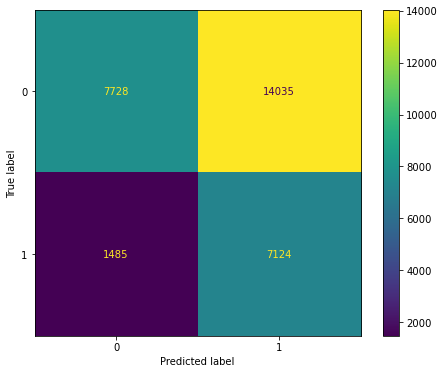

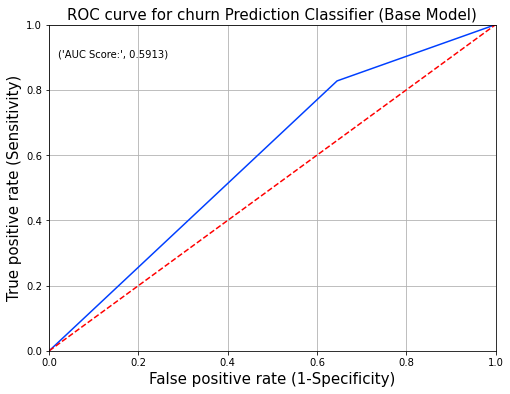

In [290]:
tuned_NB=GaussianNB(var_smoothing=0.23101297000831597)

bagged_tuned_NB=BaggingClassifier(base_estimator=tuned_NB,random_state=10)

voted = VotingClassifier(estimators = [('tuned_NB',tuned_NB),('bagged_NB', bagged_tuned_NB)],voting='soft')
voted.fit(x_train,y_train)
y_pred=voted.predict(x_test)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

tpr,fpr,threshold=roc_curve(y_test,y_pred)
plt.plot(tpr, fpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for churn Prediction Classifier (Base Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))
plt.grid(True)

### tradeoff between bagged and voted model 

In [283]:
(np.mean(bagged_tuned_recall)-np.mean(voting_recall))/np.mean(bagged_tuned_recall)

0.001357777772674508

In [285]:
(np.std(bagged_tuned_recall,ddof=1)-np.std(voting_recall,ddof=1))/np.std(bagged_tuned_recall,ddof=1)

0.2123643044061268

## voting inference :
* after stacking  bagged naive bayes model and tuned naive bayes model we got a recall score of 0.8343 which is a increament in recall score from previous tuned model .
* after voting auc scores bias and variance error both got decreased .
* for a 0.0013 % in bias error gain we will be lossing 0.212 % of variance error if we choose voting model over bagged model.
* so we will consider voting model as our final model.

# Business interpretation :
* our data had a lot of outlier and those outliers were valid values instead of noice for example in visit_feature_1 all the 0s were below q1-1.5iqr and if a customer is not at all visiting a feture he is more likely to churn out . so if had removed this as a outlier treatment we would be loosing out on valuable information for the model building.
* this data had multiple discrete variable column so the approaches used on these varaibles had a lot of affect on model scores.
* categorical variables had very high unique values so dealing with them properly had a very large affect on model scores . for example in city column we had around 700 unique values so using knn classifier to treat missing values in the and later on using payment initiated sum of cities bining them to tiers to reduce unique values and then one hot encoding had a major impact on the model scores . 
* out of all the algorithms naive bayes was giving the best recall score about 0.77 in base model after hyper parameter tuning this score increased to 0.8337 and bias and variance errors were recall bais error :  0.16455031604792159 , recall variance error :  0.01883208997948836 
* since the variance error was a little high tried bagging using BaggingClassifier this had a very little effect on bias and variance error 
* then stacking the model using Voting classifier the models overall scores were improved .
* our final voted model has a recall bias error and variance errors are recall bais error :  0.16568467105897966 , recall variance error :  0.014832826290480725